## Importing Dependencies

In [1]:
import sqlite3
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing database

In [2]:
weather_url = "https://techassessment.blob.core.windows.net/aiap18-assessment-data/weather.db"
air_quality_url = " https://techassessment.blob.core.windows.net/aiap18-assessment-data/air_quality.db"


In [3]:
# Request
weather_response = requests.get(weather_url)
air_quality_response = requests.get(air_quality_url)

# Save db
with open('data/weather.db', 'wb') as f:
    f.write(weather_response.content)

with open('data/air_quality.db', 'wb') as f:
    f.write(air_quality_response.content)


#### Reading dataframe from db

In [4]:
# Define the database file path
weather_db_path = 'data/weather.db'
air_quality_db_path = 'data/air_quality.db'

# Connect to the weather database
weather_conn = sqlite3.connect(weather_db_path)
air_quality_conn = sqlite3.connect(air_quality_db_path)

# Define a query
weather_query = "SELECT * FROM weather" 
air_quality_query = "SELECT * FROM air_quality" 

# Execute the query and load the results into a Pandas DataFrame
weather_df = pd.read_sql_query(weather_query, weather_conn)
air_df = pd.read_sql_query(air_quality_query, air_quality_conn)


# Close the connection
weather_conn.close()
air_quality_conn.close()

## Preparing data

#### View sample of data

In [5]:
weather_df.head()

data_ref        date Daily Rainfall Total (mm)  \
0  4d4d20c2-0167-4bc2-a62c-4df6e11fb2ea  01/04/2014                         -   
1  c9d3c825-fd94-4e61-a4bc-2cf0f2208de0  02/04/2014                         0   
2  6d445ffb-d4c2-4f94-a27e-224fabe46d10  03/04/2014                         0   
3  7a404c50-710f-451a-9a42-a66bb783a3d0  04/04/2014                         0   
4  0d3194a7-ad1a-456e-9bf8-b1bae730977b  05/04/2014                      23.4   

  Highest 30 Min Rainfall (mm) Highest 60 Min Rainfall (mm)  \
0                            2                            2   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                         15.2                         17.2   

  Highest 120 Min Rainfall (mm) Min Temperature (deg C)  \
0                             2                    28.4   
1                            --                    28.8   
2                             0                    29.3   
3                             0                    28.6   
4                          17.4                    26.4   

  Maximum Temperature (deg C) Min Wind Speed (km/h) Max Wind Speed (km/h)  \
0                        32.4                   7.5                  25.9   
1                        32.6                    --                  33.1   
2                          --                    --                  43.2   
3                        32.4                   7.4                  33.1   
4                          28                   5.4                  28.1   

   Sunshine Duration (hrs)  Cloud Cover (%)  Wet Bulb Temperature (deg F)  \
0                     8.07             18.0                         -59.3   
1                     7.57             23.0                          59.2   
2                     6.72             16.0                          59.7   
3                     7.55             20.0                          59.1   
4                     5.27             74.0                          58.9   

   Relative Humidity (%)  Air Pressure (hPa) Dew Point Category  \
0                  100.0                1006                 VH   
1                  100.0                1005          Very High   
2                   98.5                1005                Low   
3                  100.0                1011          Very High   
4                  100.0                1012          Very High   

  Wind Direction Daily Solar Panel Efficiency  
0              W                         High  
1              S                       Medium  
2              E                       Medium  
3              W                       Medium  
4           east                          Low

In [6]:
air_df.head()

data_ref        date pm25_north pm25_south  \
0  4d4d20c2-0167-4bc2-a62c-4df6e11fb2ea  01/04/2014         20         16   
1  c9d3c825-fd94-4e61-a4bc-2cf0f2208de0  02/04/2014         18         14   
2  6d445ffb-d4c2-4f94-a27e-224fabe46d10  03/04/2014         12         12   
3  7a404c50-710f-451a-9a42-a66bb783a3d0  04/04/2014         --          -   
4  0d3194a7-ad1a-456e-9bf8-b1bae730977b  05/04/2014         18         19   

  pm25_east pm25_west pm25_central psi_north psi_south psi_east psi_west  \
0        18        23           19        58        56       57       66   
1         -        22           16        57        53       54       61   
2        10        14           10        55        53       52       59   
3        24        19           25        58        57       55        -   
4        21        13           17        64        64       66        -   

  psi_central  
0          59  
1          56  
2          54  
3          56  
4          66

In [7]:
weather_df.shape

(3517, 18)

In [8]:
air_df.shape

(3875, 12)

Number of rows between 2 dataset does not match

#### Checking for duplicated data

In [9]:
weather_df.duplicated().sum()

320

In [10]:
air_df.duplicated().sum()

639

#### Dropping duplicated data

In [11]:
# Drop duplicate data
weather_df = weather_df.drop_duplicates()
air_df = air_df.drop_duplicates()

In [12]:
weather_df.shape

(3197, 18)

In [13]:
weather_df['data_ref'].nunique()

3197

In [14]:
weather_df['date'].nunique()

3197

Weather data set have 3197 unique data_ref and date which match the dataset

In [15]:
air_df['data_ref'].duplicated().sum()

39

In [16]:
air_df['date'].duplicated().sum()

39

There are 39 repeated entry

In [17]:
#Diplay duplicated data
air_df[air_df['date'].duplicated()]

data_ref        date pm25_north pm25_south  \
3836  35584110-55ba-4126-a355-34cd534d4de1  10/08/2015         22         21   
3837  d8aa5bc3-3fcf-461c-a78b-a9bd997d2751  29/08/2019         15         18   
3838  52a9cb85-3a9a-4b88-bf5a-dd3a42ef8b7d  07/07/2021         29         17   
3839  bf346a8b-64b6-4fd1-8df7-3054f3acf2ff  05/02/2022         10          8   
3840  cba8f618-0e80-482a-bf02-beab1099f21e  19/11/2018          -          8   
3841  f420775d-da32-41c6-b13d-62259d89ef92  01/03/2022         11          8   
3842  5714e2c0-3bb2-46b3-8a9f-070d8c6a1f65  10/12/2017         17         --   
3843  acbe6d78-beeb-42d6-9ae8-4c1e790a4ea3  27/03/2018          8          9   
3844  61b965e3-d215-4fcb-8ad5-78fdb7a5632c  05/05/2016         14         18   
3845  0acf11b1-b4c3-4297-96c2-63af9974aab8  27/04/2015         16         14   
3846  0487564a-4c04-469e-b345-8f70bb2359af  01/12/2019          7          9   
3847  a9fbb7cb-e769-4324-acd0-2f627221353e  18/12/2016         --         10   
3848  36f81d92-1886-4ff2-8ec3-06aab214b7d2  18/03/2017         15         26   
3849  9054fad2-24b0-4a1f-9291-160f0818b769  02/01/2019         16         15   
3850  b998fdb6-079e-48fe-b70f-17d3b13c227b  24/02/2022          6          4   
3851  2983cc7a-2e35-4295-80bf-897f7efe84a5  13/02/2015          -         19   
3852  b54c3a76-57c3-4f30-9005-a96932156173  11/12/2020         11         12   
3853  a5248114-60dd-48db-81fe-7acc06f47ea9  19/06/2018         11         13   
3854  0f4cee96-ad77-4021-8888-b91e9311588c  10/11/2022          4          6   
3855  e8ccd011-1612-43a8-9ea5-80d883fb88a2  27/07/2014         15         12   
3856  0647ec7e-b4ab-4b2b-a372-30580c0ea3e5  20/05/2014         12         --   
3857  0405e809-4714-4b38-a18e-4de8d04a4a6a  28/11/2020         --         13   
3858  6d6ca87c-f7f0-4d3f-8161-b8bc0b3ceb09  18/05/2017          9         10   
3859  6ebc330c-3462-4f30-a74c-be40dab2c384  03/09/2015         45         48   
3860  02b1b301-119b-439c-9f7f-19d7f3d6406d  26/10/2017         19         20   
3861  29de807f-2410-468c-b797-23800a4e2f49  03/12/2016         --         11   
3862  4ccf1f82-6c94-42ad-ad8b-a06af328f525  02/05/2014         16          -   
3863  5fe72643-a7b9-44f5-82a1-69435d0e75b6  19/05/2017          9         11   
3864  bbab7852-cf3f-41cd-a1d1-aea3114ff64c  01/05/2022         20         10   
3865  5cab1497-5288-4286-a99b-d93227b4635c  12/10/2017         12         12   
3866  e5701968-933b-4fbb-9073-776084101bd6  10/07/2016         15          -   
3867  53fdaea3-0540-4b04-b45d-bd3e4105ad09  06/12/2014         11          7   
3868  43aa15d8-9aa9-4bcd-8839-80dc57642780  08/12/2018          8         10   
3869  654b6812-f3c8-4fed-940f-2eae39dd97d1  26/02/2016         11         11   
3870  c7ba7dbf-8eb0-42d9-ae26-916cac456dee  09/09/2015         30         30   
3871  85ffffd7-9e90-444e-a030-cbcdc039a3a7  27/04/2016         26         15   
3872  da402a4c-4d07-47d3-8439-411e23e615ef  29/07/2020         --         15   
3873  4c67f80b-faec-44d4-861e-dc5a1e8c5186  29/08/2017         21          -   
3874  2d850015-fbac-4a9b-b1d1-8f4925a7ee5b  19/08/2020         17         12   

     pm25_east pm25_west pm25_central psi_north psi_south psi_east psi_west  \
3836        22        22           --      None      None     None     None   
3837        17        16           17      None      None     None     None   
3838        14        26           28      None      None     None     None   
3839        11         7           12      None      None     None     None   
3840         9         7           11      None      None     None     None   
3841        14         -            -      None      None     None     None   
3842        23        --           20      None      None     None     None   
3843         8         7            9      None      None     None     None   
3844        18        16           23      None      None     None     None   
3845        20        15           14      

looks like all the duplicated data_ref have missing value in the psi columns

#### Checking random data ref

In [18]:
# Pick a random data_ref to see what is the issue with the data
air_df[air_df['data_ref']== 'f420775d-da32-41c6-b13d-62259d89ef92']

data_ref        date pm25_north pm25_south  \
3802  f420775d-da32-41c6-b13d-62259d89ef92  01/03/2022       None       None   
3841  f420775d-da32-41c6-b13d-62259d89ef92  01/03/2022         11          8   

     pm25_east pm25_west pm25_central psi_north psi_south psi_east psi_west  \
3802      None      None         None        51        46       53       35   
3841        14         -            -      None      None     None     None   

     psi_central  
3802          --  
3841        None

In [19]:
air_df[air_df['data_ref']== '4c67f80b-faec-44d4-861e-dc5a1e8c5186']

data_ref        date pm25_north pm25_south  \
3834  4c67f80b-faec-44d4-861e-dc5a1e8c5186  29/08/2017       None       None   
3873  4c67f80b-faec-44d4-861e-dc5a1e8c5186  29/08/2017         21          -   

     pm25_east pm25_west pm25_central psi_north psi_south psi_east psi_west  \
3834      None      None         None        63         -       57       55   
3873         -        14           18      None      None     None     None   

     psi_central  
3834          57  
3873        None

The data entry of pm and psi was seperated into 2 rows

### Create dataframe for duplicated rows

In [20]:
duplicates = air_df[air_df.duplicated('data_ref',keep=False)]

### Create function to merge duplicated rows

In [21]:
def merge_rows(group):
    merged = group.iloc[0].copy()
    for i in range(1, len(group)):
        for col in group.columns:
            if pd.isna(merged[col]) or merged[col] in [None, '-', '--']:
                merged[col] = group.iloc[i][col] if not pd.isna(group.iloc[i][col]) and group.iloc[i][col] not in [None, '-', '--'] else merged[col]
    return merged

In [22]:
merged_rows = duplicates.groupby('data_ref').apply(merge_rows).reset_index(drop=True)

C:\Users\Hyeen\AppData\Local\Temp\ipykernel_58976\340623551.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_rows = duplicates.groupby('data_ref').apply(merge_rows).reset_index(drop=True)


In [23]:
non_duplicates = air_df[~air_df['data_ref'].isin(duplicates['data_ref'])]
final_air_df = pd.concat([non_duplicates, merged_rows], ignore_index=True)

#### Checking if the unique row is the same

In [24]:
final_air_df['data_ref'].nunique()

3197

## Merging the datas

In [25]:
df = pd.merge(weather_df, final_air_df, on='date', how='inner')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   data_ref_x                     3197 non-null   object 
 1   date                           3197 non-null   object 
 2   Daily Rainfall Total (mm)      3197 non-null   object 
 3   Highest 30 Min Rainfall (mm)   3197 non-null   object 
 4   Highest 60 Min Rainfall (mm)   3197 non-null   object 
 5   Highest 120 Min Rainfall (mm)  3197 non-null   object 
 6   Min Temperature (deg C)        3197 non-null   object 
 7   Maximum Temperature (deg C)    3197 non-null   object 
 8   Min Wind Speed (km/h)          3197 non-null   object 
 9   Max Wind Speed (km/h)          3185 non-null   object 
 10  Sunshine Duration (hrs)        3184 non-null   float64
 11  Cloud Cover (%)                3184 non-null   float64
 12  Wet Bulb Temperature (deg F)   3197 non-null   f

Some column is in wrong dtype

In [27]:
# drop data ref
df = df.drop(columns=['data_ref_x','data_ref_y'])

## Converting dtype of Columns

In [28]:
# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

In [29]:
df.head()

date Daily Rainfall Total (mm) Highest 30 Min Rainfall (mm)  \
0 2014-04-01                         -                            2   
1 2014-04-02                         0                            0   
2 2014-04-03                         0                            0   
3 2014-04-04                         0                            0   
4 2014-04-05                      23.4                         15.2   

  Highest 60 Min Rainfall (mm) Highest 120 Min Rainfall (mm)  \
0                            2                             2   
1                            0                            --   
2                            0                             0   
3                            0                             0   
4                         17.2                          17.4   

  Min Temperature (deg C) Maximum Temperature (deg C) Min Wind Speed (km/h)  \
0                    28.4                        32.4                   7.5   
1                    28.8                        32.6                    --   
2                    29.3                          --                    --   
3                    28.6                        32.4                   7.4   
4                    26.4                          28                   5.4   

  Max Wind Speed (km/h)  Sunshine Duration (hrs)  ...  pm25_north  pm25_south  \
0                  25.9                     8.07  ...          20          16   
1                  33.1                     7.57  ...          18          14   
2                  43.2                     6.72  ...          12          12   
3                  33.1                     7.55  ...          --           -   
4                  28.1                     5.27  ...          18          19   

   pm25_east  pm25_west pm25_central psi_north psi_south psi_east psi_west  \
0         18         23           19        58        56       57       66   
1          -         22           16        57        53       54       61   
2         10         14           10        55        53       52       59   
3         24         19           25        58        57       55        -   
4         21         13           17        64        64       66        -   

  psi_central  
0          59  
1          56  
2          54  
3          56  
4          66  

[5 rows x 27 columns]

In [30]:
def convert_object_to_float(df,columns):
    for column in columns:
        df[column] = df[column].apply(pd.to_numeric, errors='coerce')
    
    return df

In [31]:
# Specify the columns to conver to numeric
columns = ['Daily Rainfall Total (mm)','Highest 30 Min Rainfall (mm)','Highest 60 Min Rainfall (mm)','Highest 120 Min Rainfall (mm)','Min Temperature (deg C)','Maximum Temperature (deg C)','Min Wind Speed (km/h)',
           'Max Wind Speed (km/h)','pm25_north','pm25_south','pm25_east','pm25_west','pm25_central','psi_north','psi_south','psi_east','psi_west','psi_central']

In [32]:
df = convert_object_to_float(df,columns)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           3197 non-null   datetime64[ns]
 1   Daily Rainfall Total (mm)      2885 non-null   float64       
 2   Highest 30 Min Rainfall (mm)   2879 non-null   float64       
 3   Highest 60 Min Rainfall (mm)   2876 non-null   float64       
 4   Highest 120 Min Rainfall (mm)  2881 non-null   float64       
 5   Min Temperature (deg C)        2883 non-null   float64       
 6   Maximum Temperature (deg C)    2883 non-null   float64       
 7   Min Wind Speed (km/h)          2878 non-null   float64       
 8   Max Wind Speed (km/h)          2869 non-null   float64       
 9   Sunshine Duration (hrs)        3184 non-null   float64       
 10  Cloud Cover (%)                3184 non-null   float64       
 11  Wet Bulb Temperat

In [33]:
df.describe()

date  Daily Rainfall Total (mm)  \
count                 3197                2885.000000   
mean   2018-08-16 00:00:00                   5.228007   
min    2014-04-01 00:00:00                   0.000000   
25%    2016-06-08 00:00:00                   0.000000   
50%    2018-08-16 00:00:00                   0.000000   
75%    2020-10-23 00:00:00                   4.000000   
max    2022-12-31 00:00:00                 210.600000   
std                    NaN                  12.487075   

       Highest 30 Min Rainfall (mm)  Highest 60 Min Rainfall (mm)  \
count                   2879.000000                   2876.000000   
mean                       3.128413                      3.752851   
min                        0.000000                      0.000000   
25%                        0.000000                      0.000000   
50%                        0.000000                      0.000000   
75%                        2.600000                      3.050000   
max                       53.400000                     73.800000   
std                        6.607176                      8.196244   

       Highest 120 Min Rainfall (mm)  Min Temperature (deg C)  \
count                    2881.000000              2883.000000   
mean                        4.342208                28.072806   
min                         0.000000                23.000000   
25%                         0.000000                27.400000   
50%                         0.000000                28.200000   
75%                         3.600000                28.900000   
max                        85.600000                30.700000   
std                         9.502675                 1.091435   

       Maximum Temperature (deg C)  Min Wind Speed (km/h)  \
count                  2883.000000            2878.000000   
mean                     31.733750               8.787943   
min                      23.700000               0.400000   
25%                      31.000000               6.500000   
50%                      32.000000               8.000000   
75%                      32.700000              10.800000   
max                      35.400000              21.400000   
std                       1.480098               3.003182   

       Max Wind Speed (km/h)  Sunshine Duration (hrs)  ...   pm25_north  \
count            2869.000000              3184.000000  ...  2885.000000   
mean               29.916765                 7.021734  ...    14.866031   
min               -59.800000                 0.000000  ...     4.000000   
25%                27.800000                 6.707500  ...    10.000000   
50%                31.500000                 7.400000  ...    13.000000   
75%                36.000000                 7.840000  ...    17.000000   
max                70.600000                 9.150000  ...   199.000000   
std                14.674570                 1.378801  ...    10.478488   

        pm25_south    pm25_east    pm25_west  pm25_central    psi_north  \
count  2882.000000  2888.000000  2884.000000   2882.000000  2887.000000   
mean     14.574774    14.428670    13.601075     14.126648    51.627122   
min       3.000000     3.000000     2.000000      3.000000    18.000000   
25%       9.000000     9.000000     8.000000      9.000000    43.000000   
50%      12.000000    12.000000    11.000000     12.000000    52.000000   
75%      16.000000    16.000000    16.000000     16.000000    57.000000   
max     235.000000   176.000000   197.000000    176.000000   265.000000   
std      11.960294    10.769064    12.075010      9.240111    15.266515   

         psi_south     psi_east     psi_west  psi_central  
count  2890.000000  2885.000000  2887.000000  2881.000000  
mean     50.462630    50.744541    48.224801    50.075842  
min      16.000000    17.000000    15.000000    17.000000  
25%      41.000000    42.000000    37.000000    41.000000  
50%      52.000000    52.000000    49.000000    52.000000  
75%      56.000000    57.000000    56.

## Check missing value

In [34]:
missing_value_features = [feature for feature in df if df[feature].isna().sum() > 0]
for feature in missing_value_features :
    print(f"{feature} have : {df[feature].isna().sum()}")

Daily Rainfall Total (mm) have : 312
Highest 30 Min Rainfall (mm) have : 318
Highest 60 Min Rainfall (mm) have : 321
Highest 120 Min Rainfall (mm) have : 316
Min Temperature (deg C) have : 314
Maximum Temperature (deg C) have : 314
Min Wind Speed (km/h) have : 319
Max Wind Speed (km/h) have : 328
Sunshine Duration (hrs) have : 13
Cloud Cover (%) have : 13
pm25_north have : 312
pm25_south have : 315
pm25_east have : 309
pm25_west have : 313
pm25_central have : 315
psi_north have : 310
psi_south have : 307
psi_east have : 312
psi_west have : 310
psi_central have : 316


In [35]:
for feature in missing_value_features:
    print(f"{feature} have {df[feature].nunique()} unique values")

Daily Rainfall Total (mm) have 241 unique values
Highest 30 Min Rainfall (mm) have 168 unique values
Highest 60 Min Rainfall (mm) have 196 unique values
Highest 120 Min Rainfall (mm) have 216 unique values
Min Temperature (deg C) have 70 unique values
Maximum Temperature (deg C) have 100 unique values
Min Wind Speed (km/h) have 140 unique values
Max Wind Speed (km/h) have 202 unique values
Sunshine Duration (hrs) have 544 unique values
Cloud Cover (%) have 99 unique values
pm25_north have 72 unique values
pm25_south have 84 unique values
pm25_east have 74 unique values
pm25_west have 83 unique values
pm25_central have 66 unique values
psi_north have 110 unique values
psi_south have 111 unique values
psi_east have 106 unique values
psi_west have 115 unique values
psi_central have 103 unique values


Seems like there are no discrete feature, I will replace missing values with median value

In [36]:
for feature in missing_value_features:
    df[feature].fillna(df[feature].median(),inplace=True)

C:\Users\Hyeen\AppData\Local\Temp\ipykernel_58976\2129011010.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(df[feature].median(),inplace=True)
C:\Users\Hyeen\AppData\Local\Temp\ipykernel_58976\2129011010.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [37]:
df['Daily Solar Panel Efficiency'].value_counts()

Daily Solar Panel Efficiency
Medium    1749
Low        795
High       653
Name: count, dtype: int64

Majority of the classification is in Medium

## Custom Feature

In [38]:
df['average wind speed'] = (df['Min Wind Speed (km/h)'] + df['Max Wind Speed (km/h)']) /2
df['average temperature'] = (df['Min Temperature (deg C)']+ df['Maximum Temperature (deg C)']) /2

Since we have the min and max feature for both wind speed and temperature, it would be better to have average which can better describe wind speed and temperature of the day

## Categorising Feature

In [39]:
cat_feature = [ feature for feature in df if df[feature].dtypes == 'O']

print(f"There are {len(cat_feature)} features:")
print(cat_feature)

There are 3 features:
['Dew Point Category', 'Wind Direction', 'Daily Solar Panel Efficiency']


In [40]:
df['Dew Point Category'].value_counts()



Dew Point Category
High             1198
Very High        1040
Very Low          107
Moderate          104
Low                95
High Level         90
H                  83
HIGH               73
high               73
very high          70
Extreme            65
VERY HIGH          65
VH                 64
M                  11
MODERATE           10
LOW                 9
Normal              7
Minimal             6
VL                  5
very low            5
low                 5
moderate            4
Below Average       3
L                   3
VERY LOW            2
Name: count, dtype: int64

The data format is inconsistent

### Standardized data

In [41]:
# Mapping dictionary
category_mapping = {
    'High': 'High',
    'Very High': 'Very High',
    'Very Low': 'Very Low',
    'Moderate': 'Moderate',
    'Low': 'Low',
    'High Level': 'High',
    'H': 'High',
    'HIGH': 'High',
    'high': 'High',
    'very high': 'Very High',
    'Extreme': 'Extreme',
    'VERY HIGH': 'Very High',
    'VH': 'Very High',
    'M': 'Moderate',
    'MODERATE': 'Moderate',
    'LOW': 'Low',
    'Normal': 'Moderate',  # Assuming 'Normal' is akin to 'Moderate'
    'Minimal': 'Very Low',  # Assuming 'Minimal' is akin to 'Very Low'
    'VL': 'Very Low',
    'very low': 'Very Low',
    'low': 'Low',
    'moderate': 'Moderate',
    'Below Average': 'Low',  # Assuming 'Below Average' is akin to 'Low'
    'L': 'Low',
    'VERY LOW': 'Very Low'
}


In [42]:
df['Dew Point Category'] = df['Dew Point Category'].replace(category_mapping)
df['Dew Point Category'].value_counts()

Dew Point Category
High         1517
Very High    1239
Moderate      136
Very Low      125
Low           115
Extreme        65
Name: count, dtype: int64

In [43]:
df['Wind Direction'].value_counts()


Wind Direction
SW           368
N            349
SE           347
NW           346
W            338
E            327
S            327
NE           322
SOUTHEAST     52
southeast     40
northeast     32
NORTHEAST     29
WEST          24
Northward     22
NW.           20
northwest     20
SW.           20
south         20
NE.           19
SE.           18
E.            17
west          17
NORTHWEST     17
W.            16
Southward     14
east          14
NORTH         12
S.            11
north         10
N.            10
EAST          10
SOUTH          9
Name: count, dtype: int64

In [44]:
wind_direction_mapping = {
    'SW': 'Southwest',
    'SW.': 'Southwest',
    'southwest': 'Southwest',
    'SOUTHEAST': 'Southeast',
    'southeast': 'Southeast',
    'SE': 'Southeast',
    'SE.': 'Southeast',
    'NORTHEAST': 'Northeast',
    'northeast': 'Northeast',
    'NE': 'Northeast',
    'NE.': 'Northeast',
    'NORTHWEST': 'Northwest',
    'northwest': 'Northwest',
    'NW': 'Northwest',
    'NW.': 'Northwest',
    'Northward': 'North',
    'NORTH': 'North',
    'north': 'North',
    'N': 'North',
    'N.': 'North',
    'Southward': 'South',
    'SOUTH': 'South',
    'south': 'South',
    'S': 'South',
    'S.': 'South',
    'WEST': 'West',
    'west': 'West',
    'W': 'West',
    'W.': 'West',
    'EAST': 'East',
    'east': 'East',
    'E': 'East',
    'E.': 'East'
}

In [45]:
df['Wind Direction'] = df['Wind Direction'].replace(wind_direction_mapping)

df['Wind Direction'].value_counts()

Wind Direction
Southeast    457
Northwest    403
North        403
Northeast    402
West         395
Southwest    388
South        381
East         368
Name: count, dtype: int64

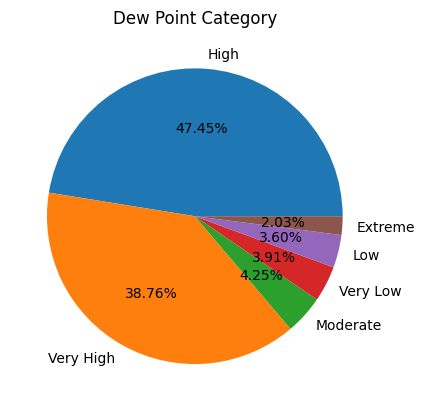

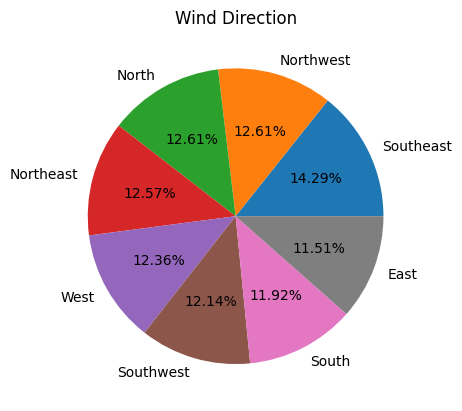

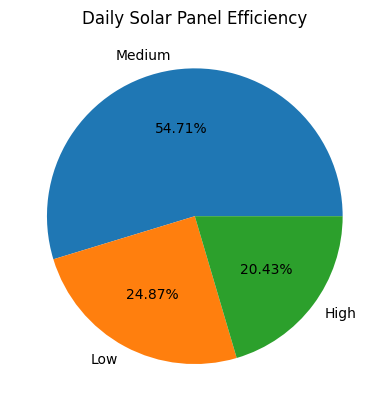

In [46]:
for feature in cat_feature:
    plt.pie(df[feature].value_counts().values,labels=df[feature].value_counts().index,autopct='%1.2f%%')
    plt.title(feature)
    plt.show()

- the wind direction data is almost evenly distributed
- Majority of the dew point is either in high or very high forming more than 80% of the data 

In [47]:
classifier = df['Daily Solar Panel Efficiency']

### Numerical Feature

In [48]:
num_feature = [ feature for feature in df if feature not in cat_feature and feature != 'date']

print(f"There are {len(num_feature)} features:")
print(num_feature)

There are 25 features:
['Daily Rainfall Total (mm)', 'Highest 30 Min Rainfall (mm)', 'Highest 60 Min Rainfall (mm)', 'Highest 120 Min Rainfall (mm)', 'Min Temperature (deg C)', 'Maximum Temperature (deg C)', 'Min Wind Speed (km/h)', 'Max Wind Speed (km/h)', 'Sunshine Duration (hrs)', 'Cloud Cover (%)', 'Wet Bulb Temperature (deg F)', 'Relative Humidity (%)', 'Air Pressure (hPa)', 'pm25_north', 'pm25_south', 'pm25_east', 'pm25_west', 'pm25_central', 'psi_north', 'psi_south', 'psi_east', 'psi_west', 'psi_central', 'average wind speed', 'average temperature']


### Check for any discrete feature in numerical feature

In [49]:
discrete_feature = [ feature for feature in num_feature if df[feature].nunique() < 20]

print(f"There are {len(discrete_feature)} features:")
print(discrete_feature)

There are 0 features:
[]


#### Visualization - Distribution

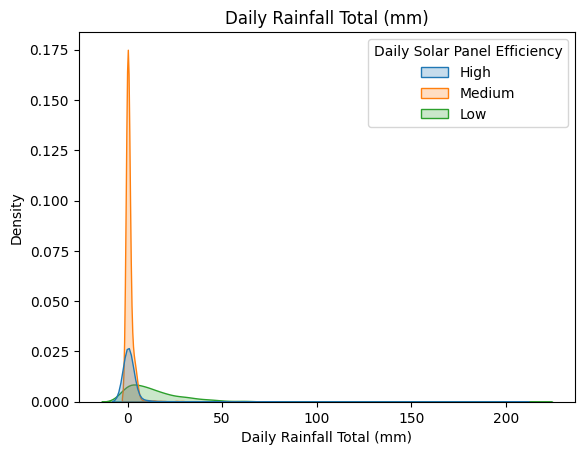

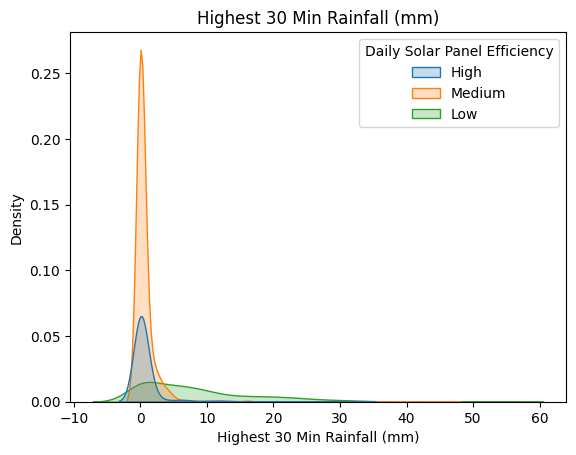

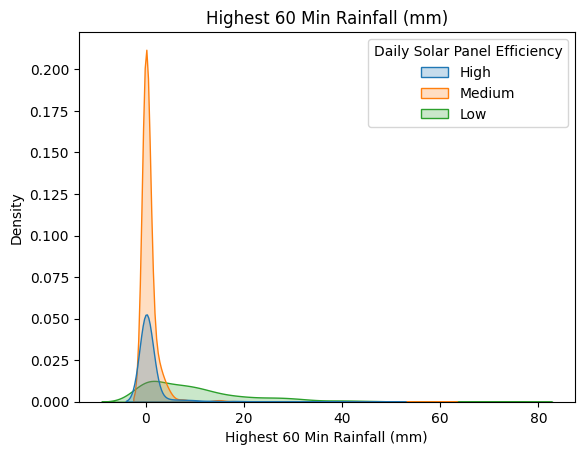

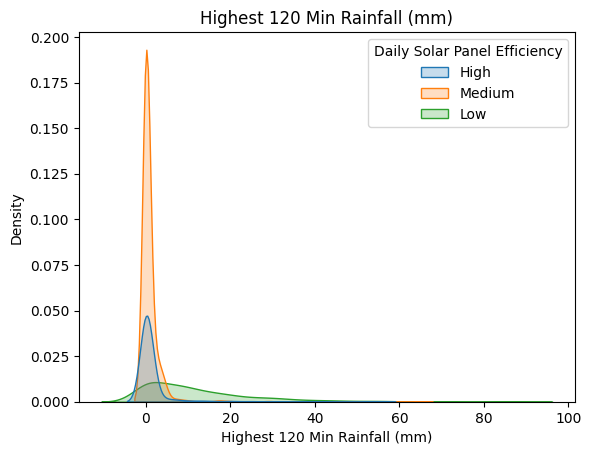

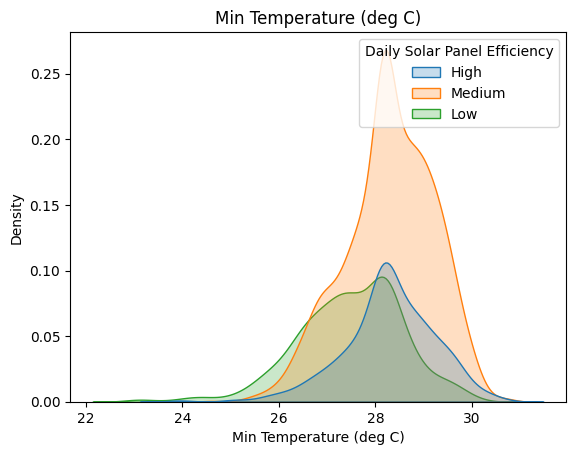

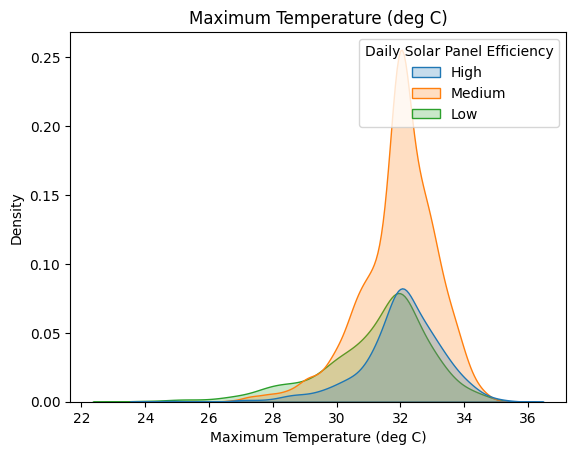

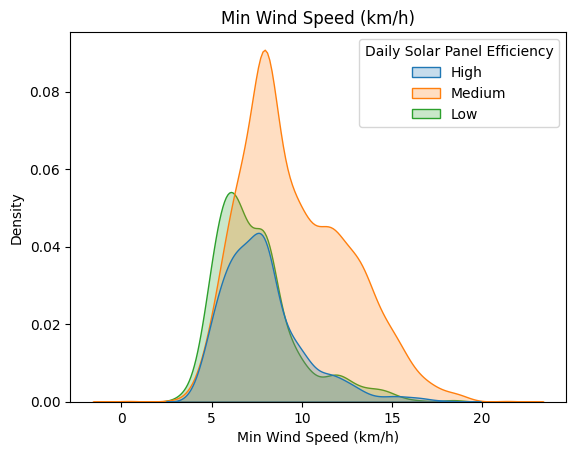

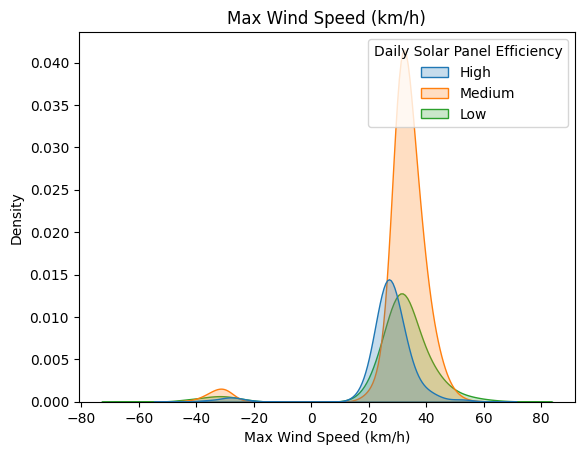

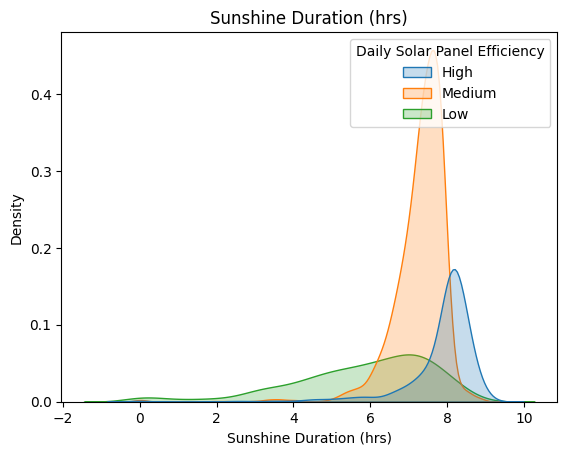

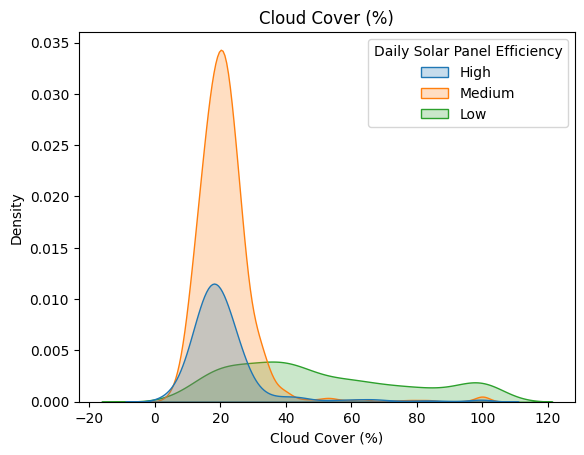

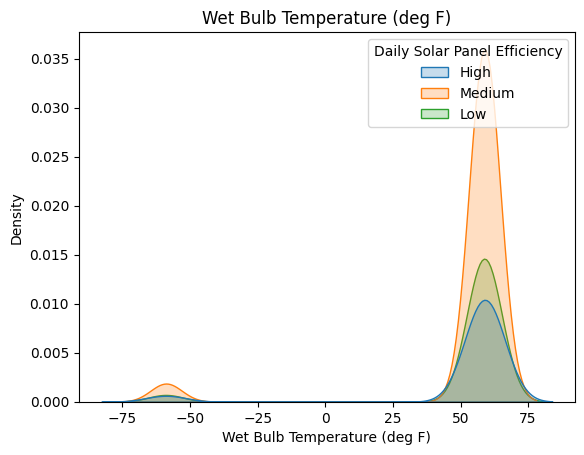

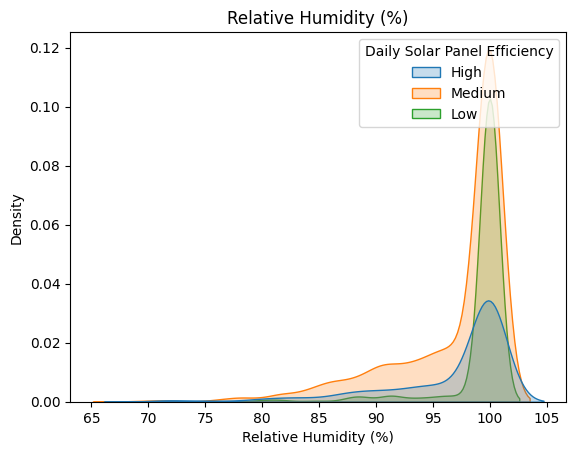

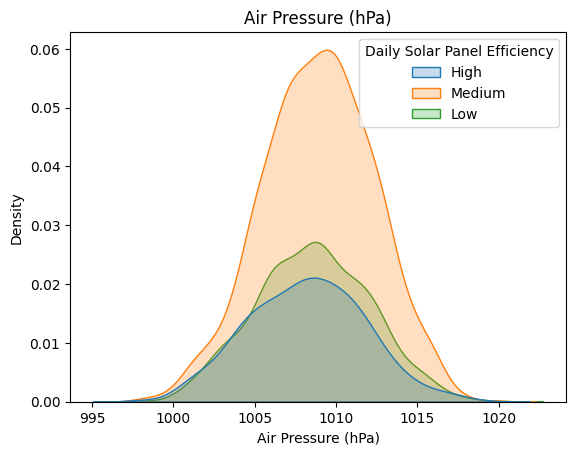

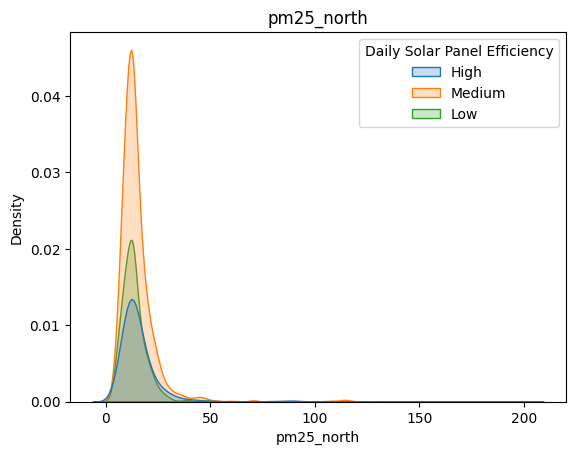

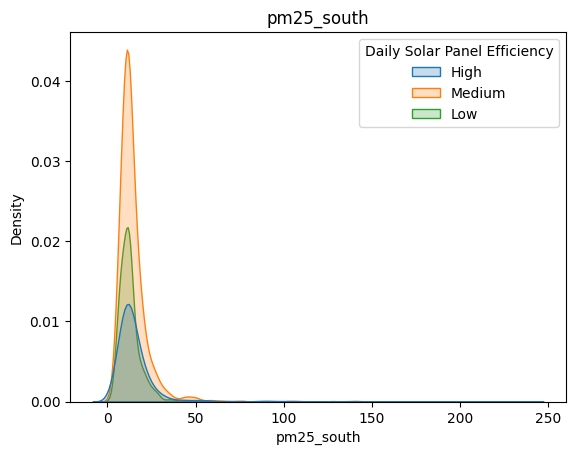

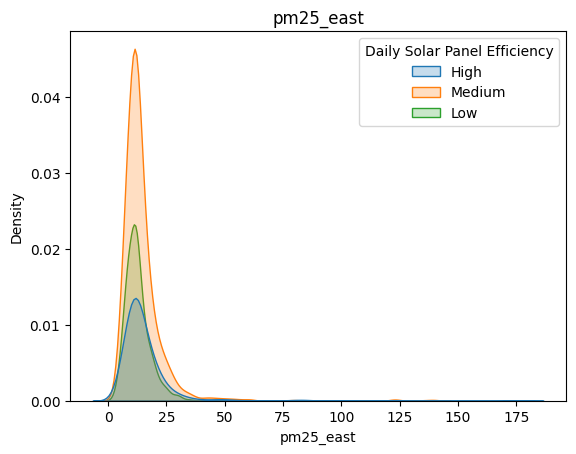

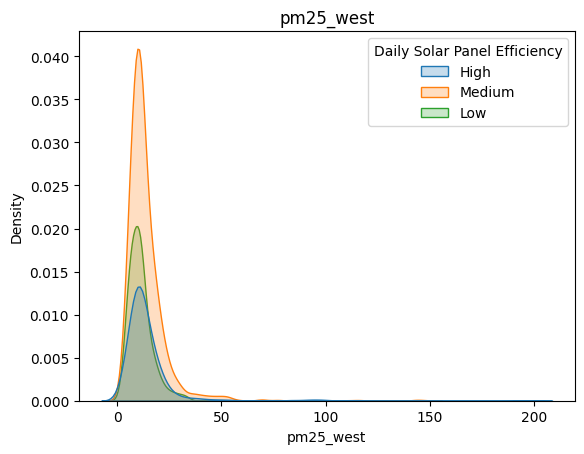

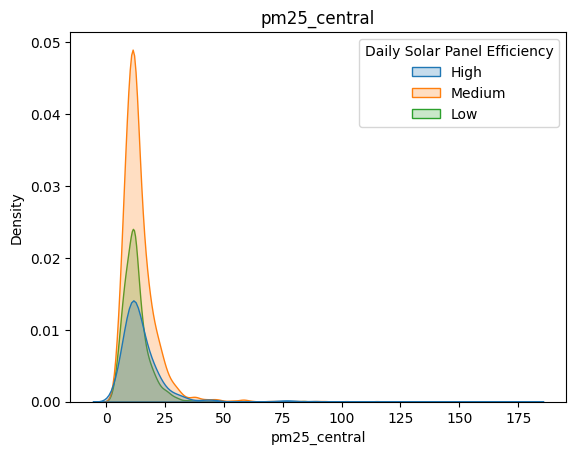

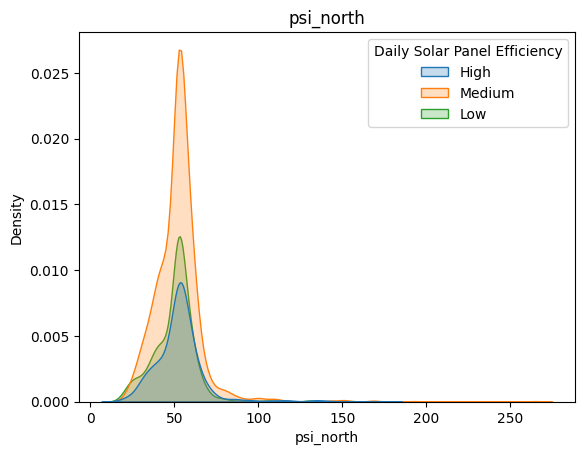

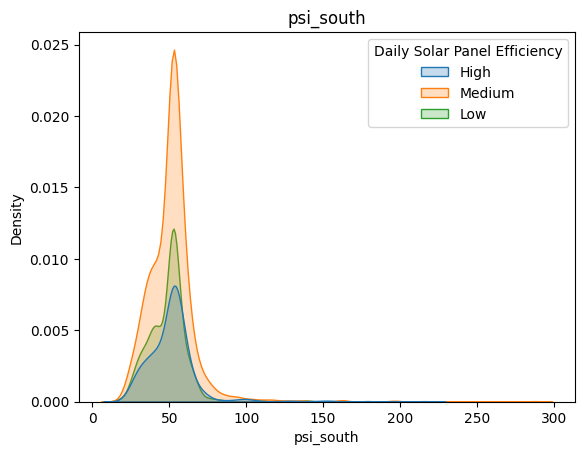

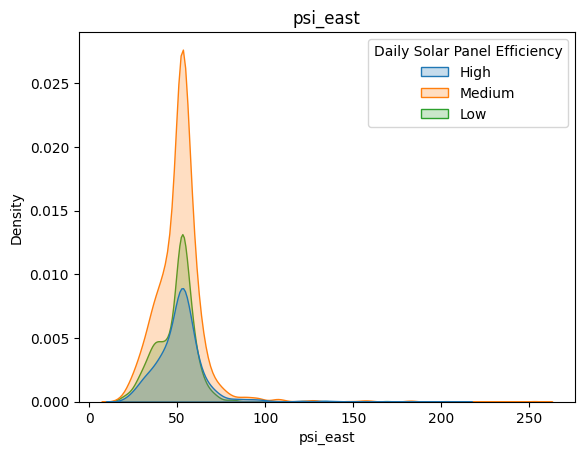

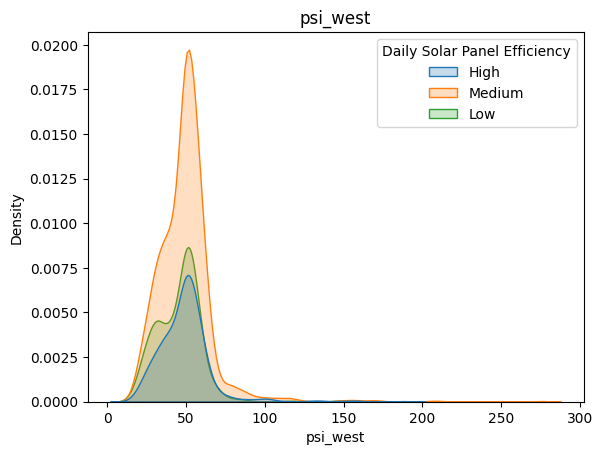

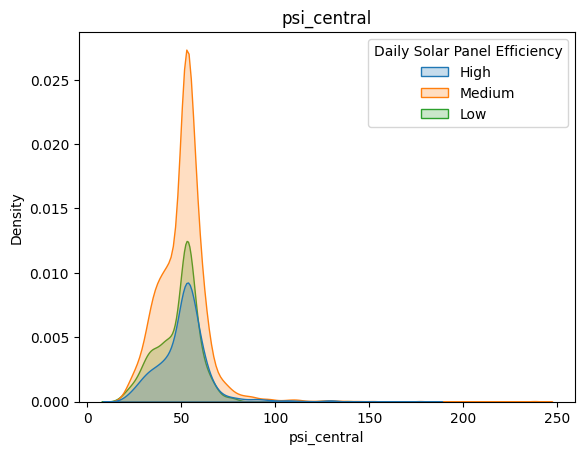

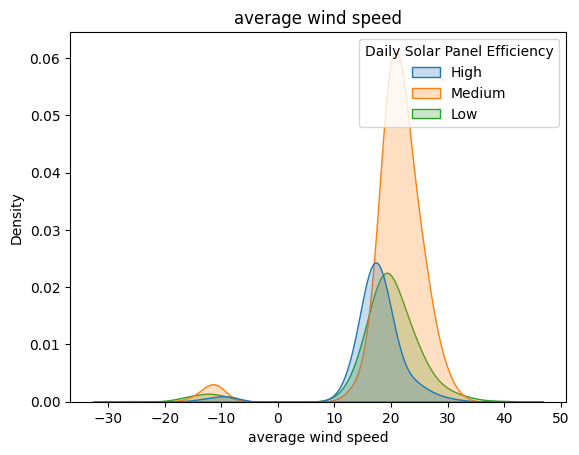

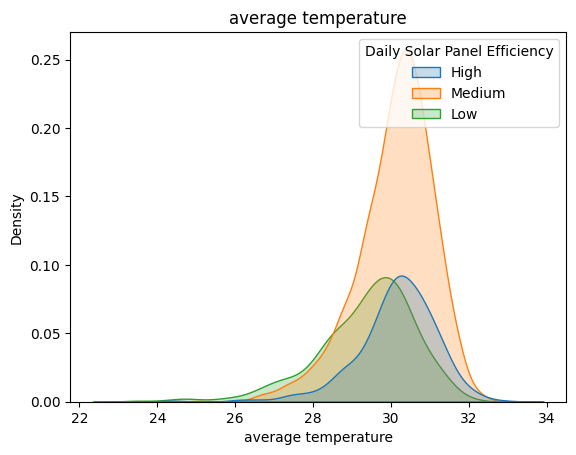

In [50]:
for feature in num_feature:
    sns.kdeplot(data=df,x=feature, hue='Daily Solar Panel Efficiency', fill=True)
    plt.title(feature)
    plt.show()

Insights
- The data classified as high have higher sunshine hours
- The label of low have much higher spread of rainfall while the other 2 is centrelized at near 0
- Low efficiency label also have larger spread of cloud coverage 
- The distribution of rainfall between daily , 30 min , 60 min and 120 min are similar
- The distribution of psi are also simlar

#### Virtualization - Outlier

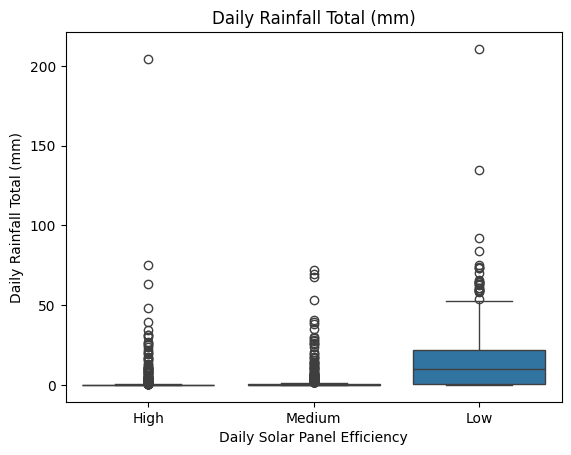

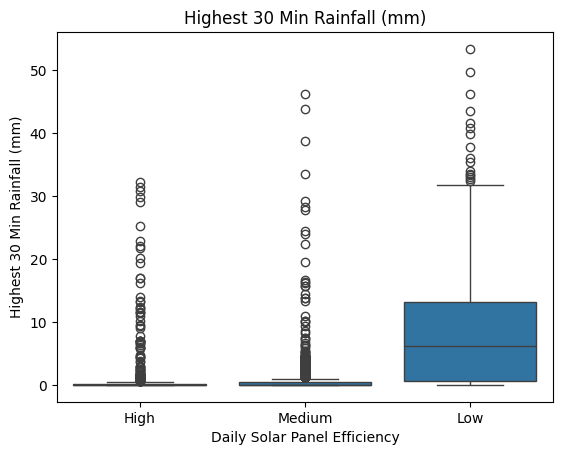

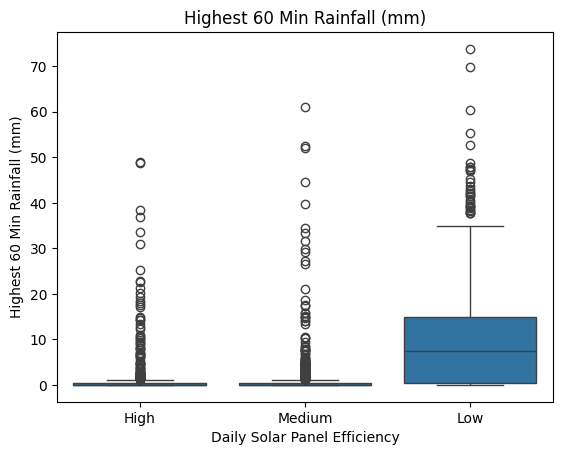

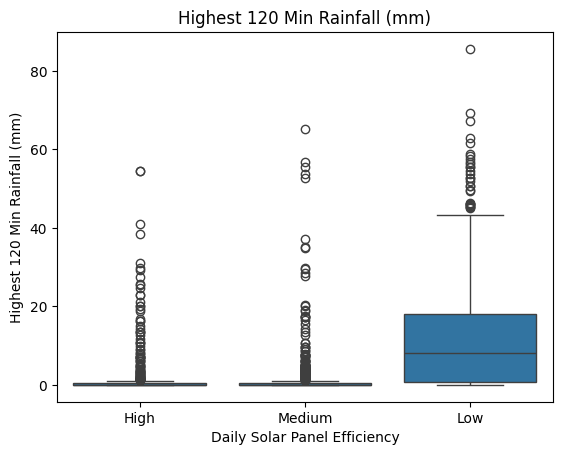

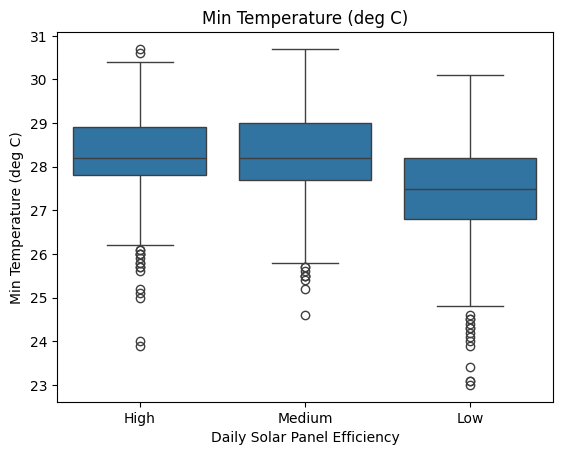

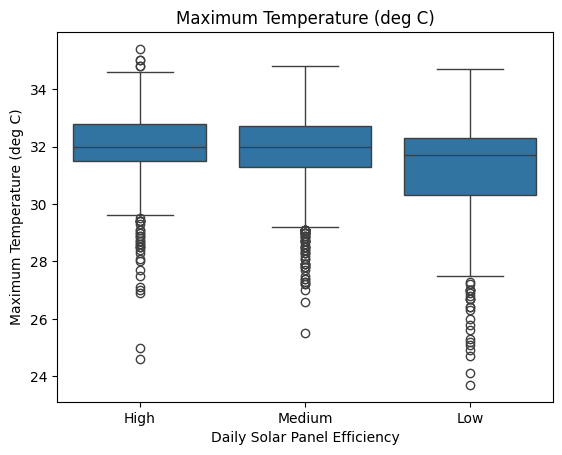

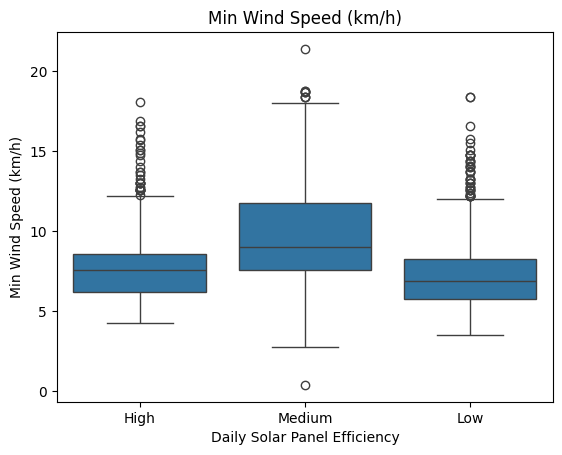

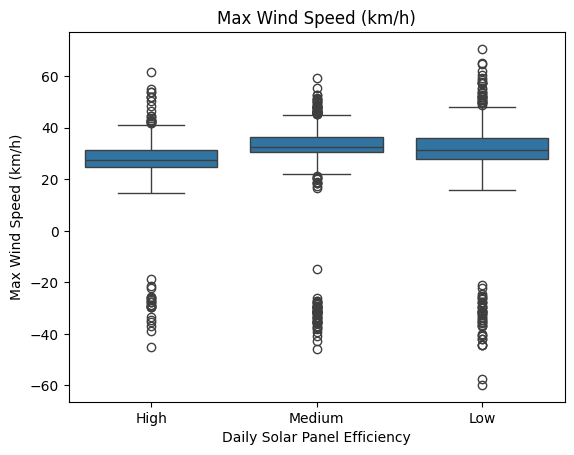

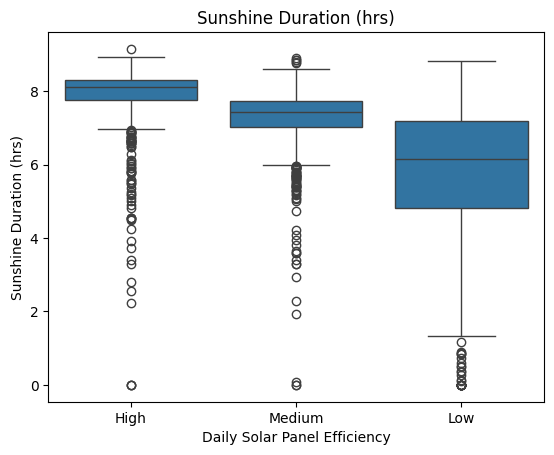

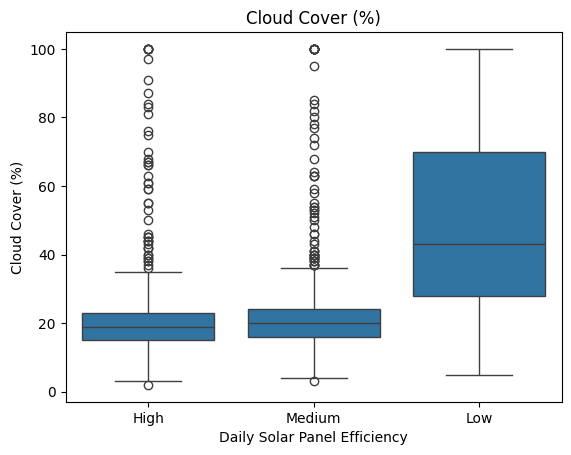

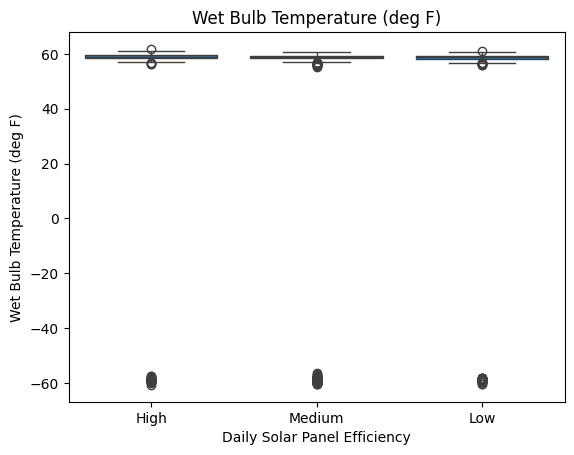

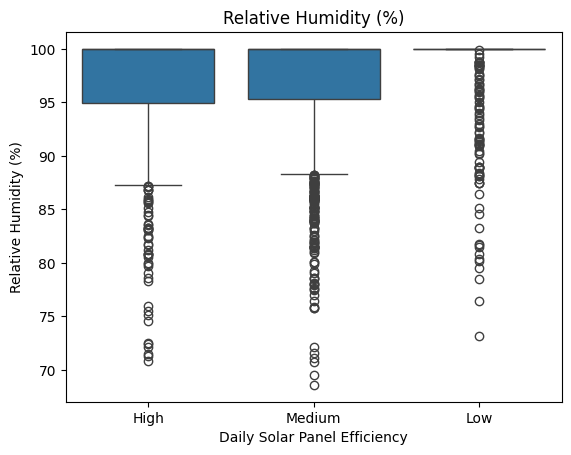

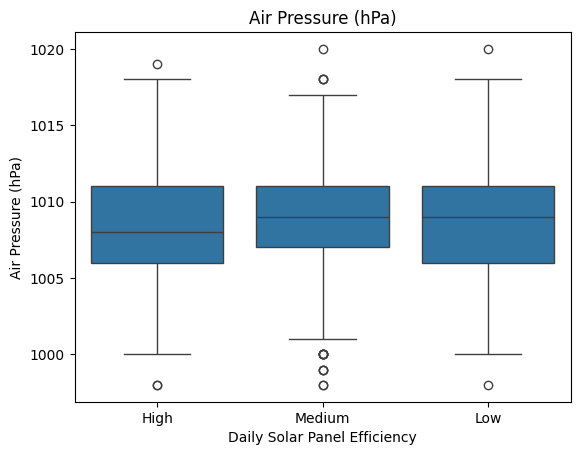

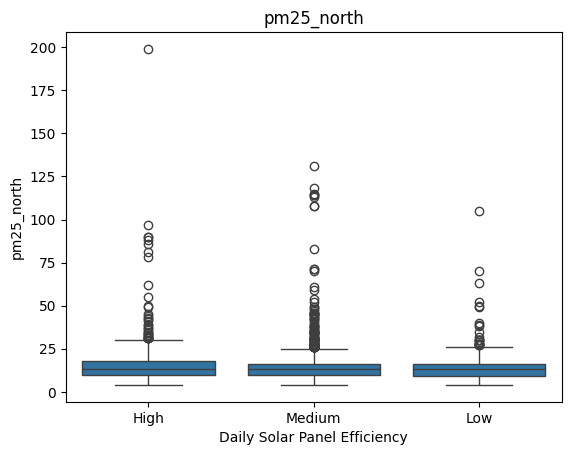

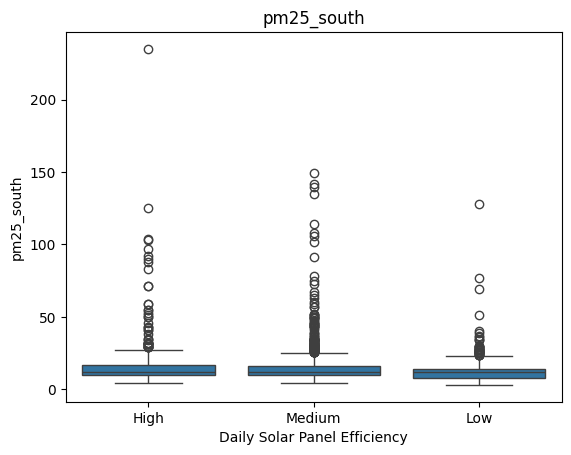

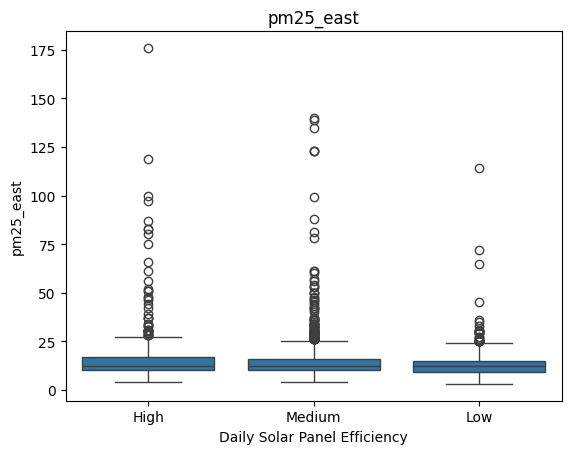

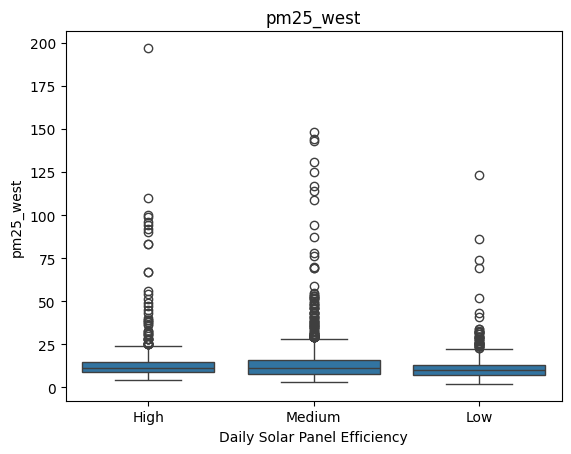

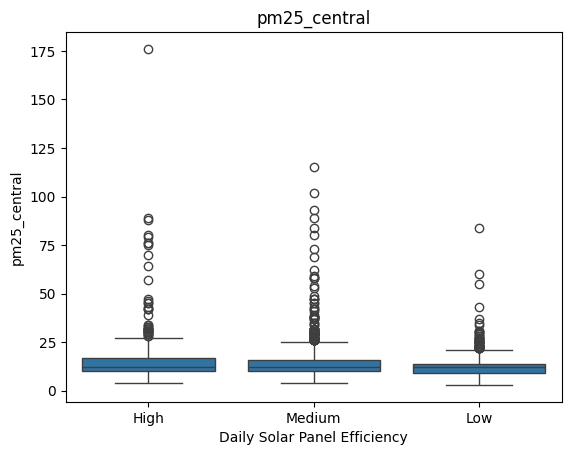

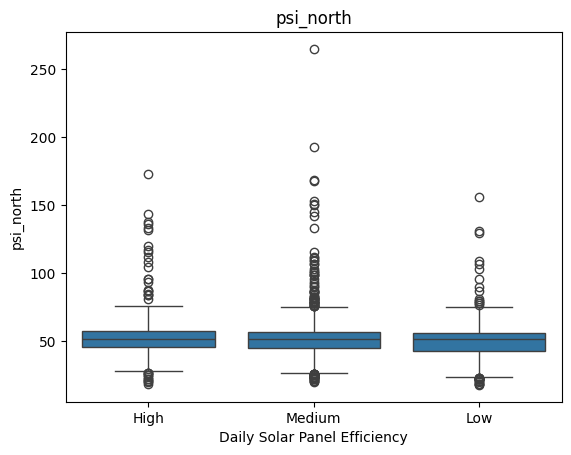

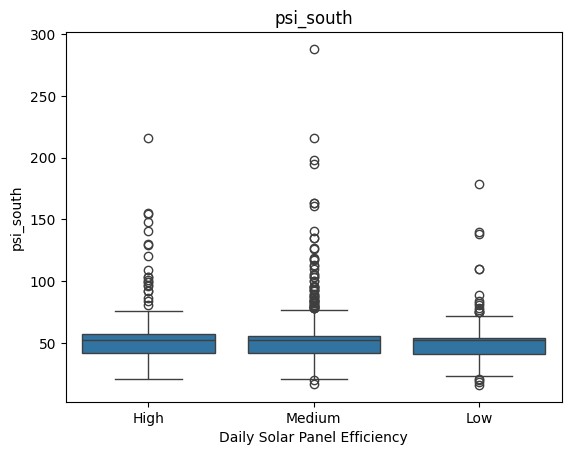

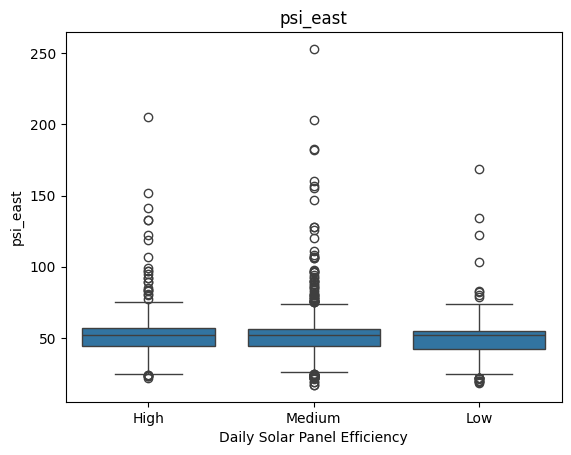

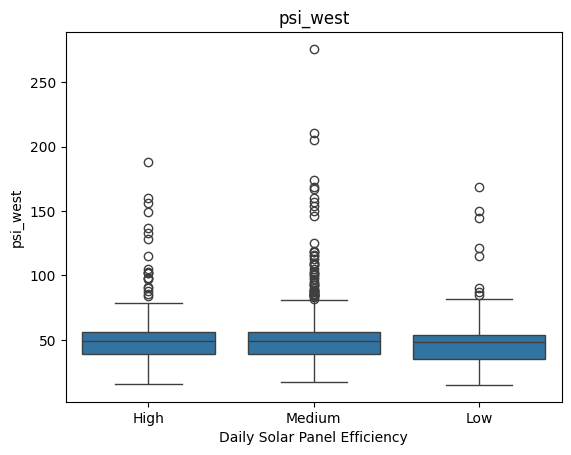

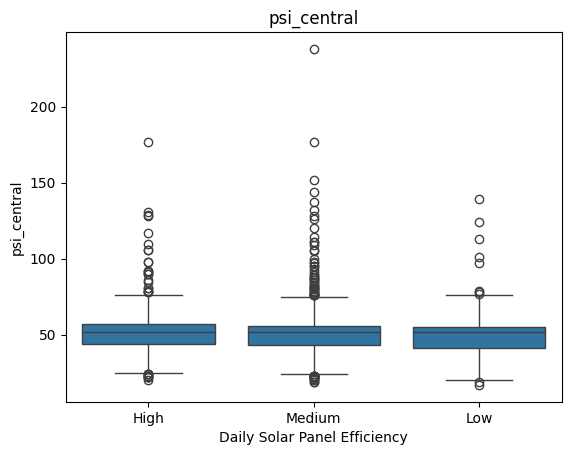

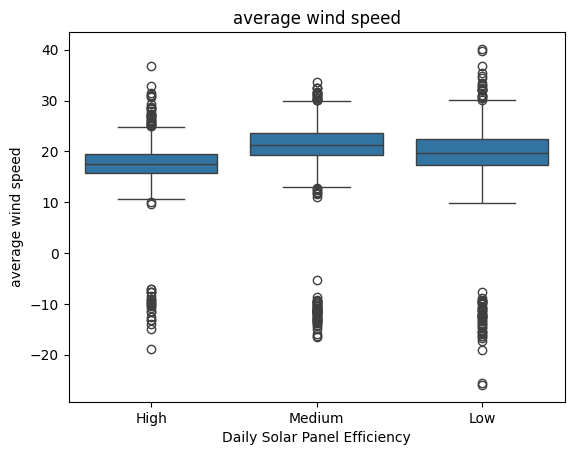

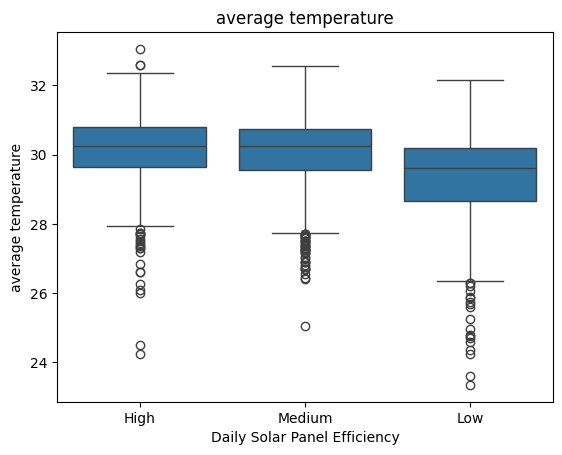

In [51]:
for feature in num_feature:
    sns.boxplot(data=df,x=classifier, y=feature)
    plt.title(feature)
    plt.show()

There are many outliers, instead of simply removing the outliers, lets try transforming the data.

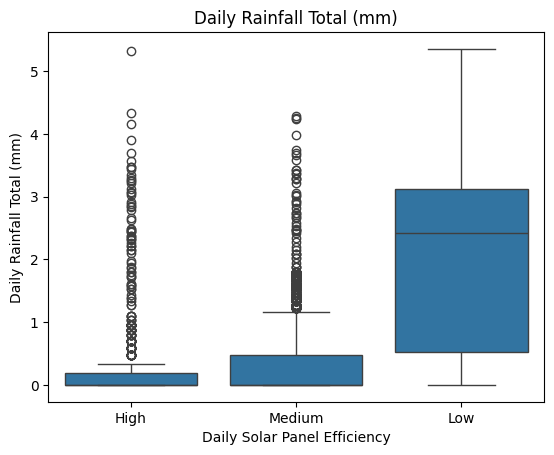

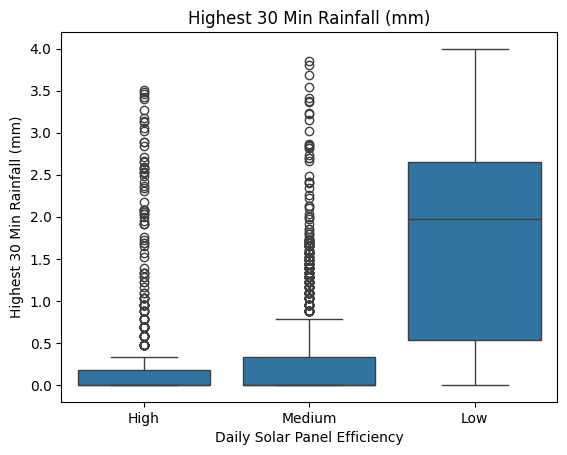

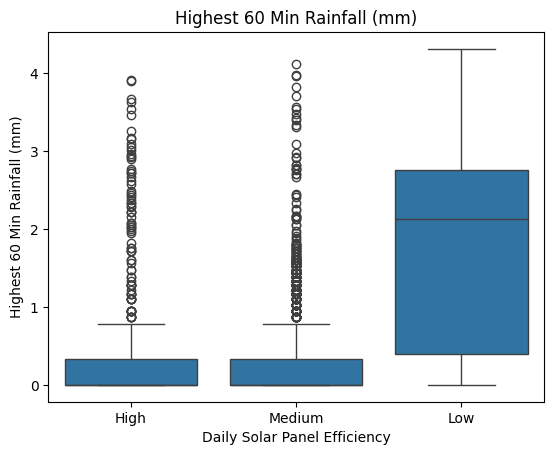

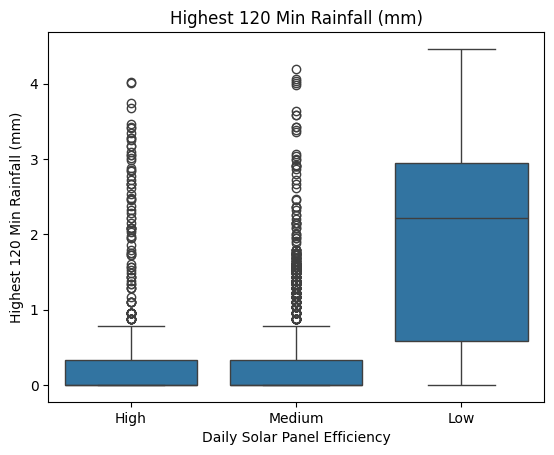

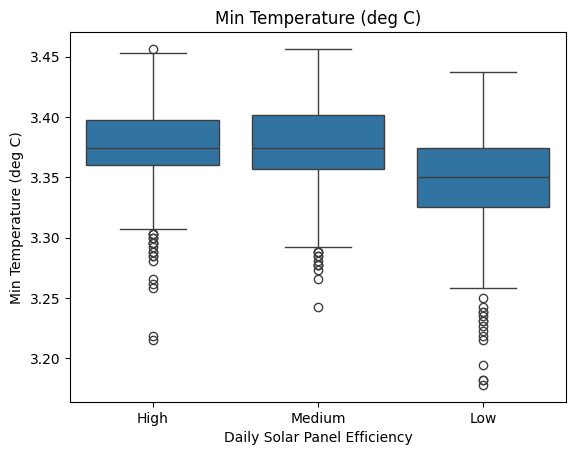

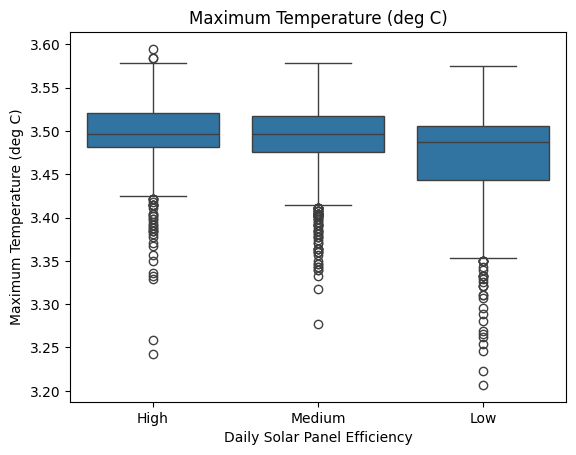

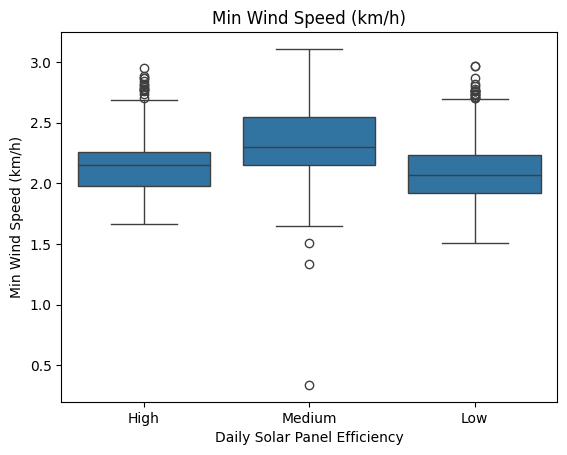

C:\Users\Hyeen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


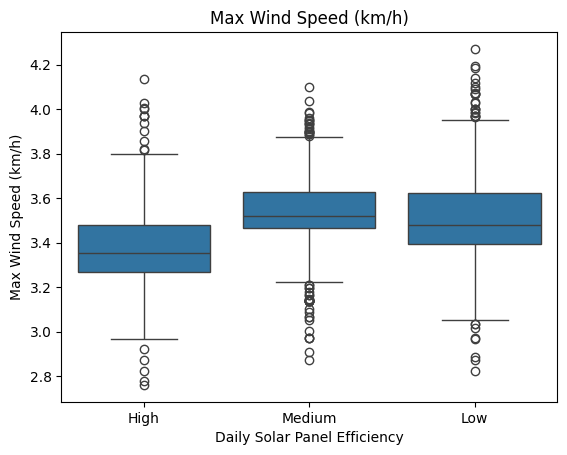

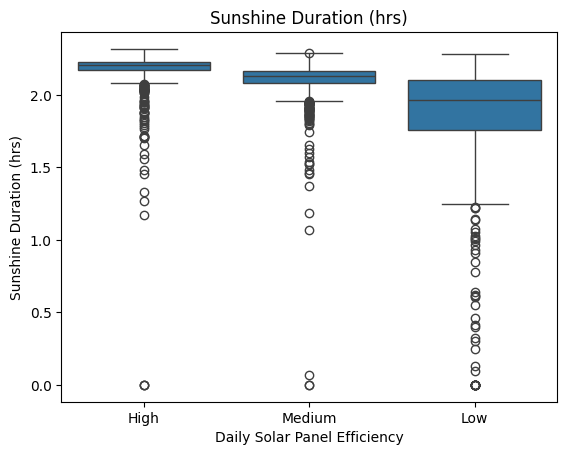

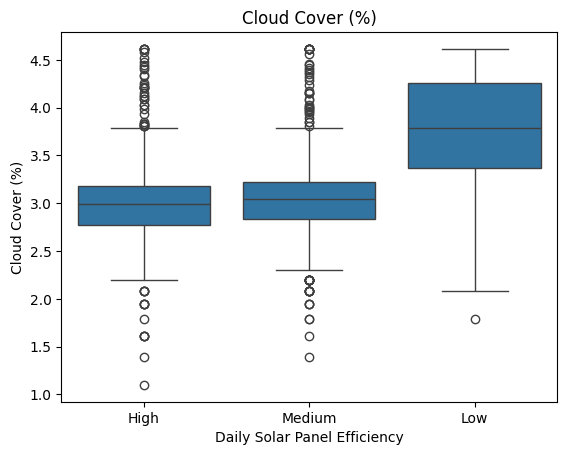

C:\Users\Hyeen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


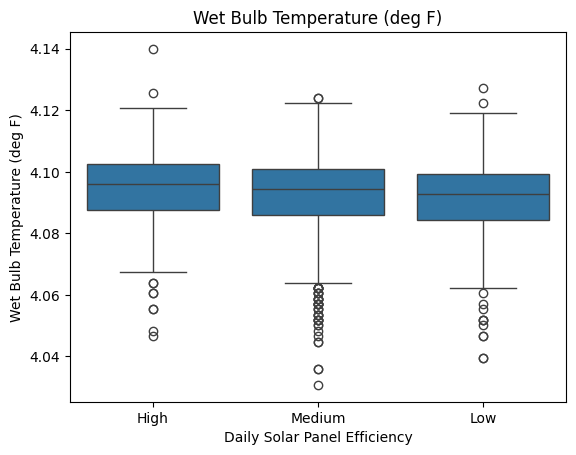

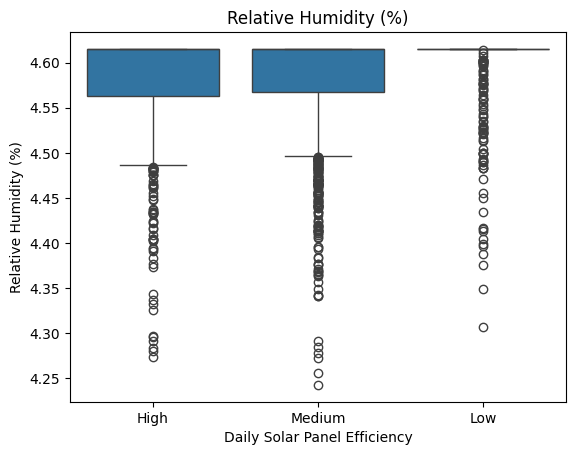

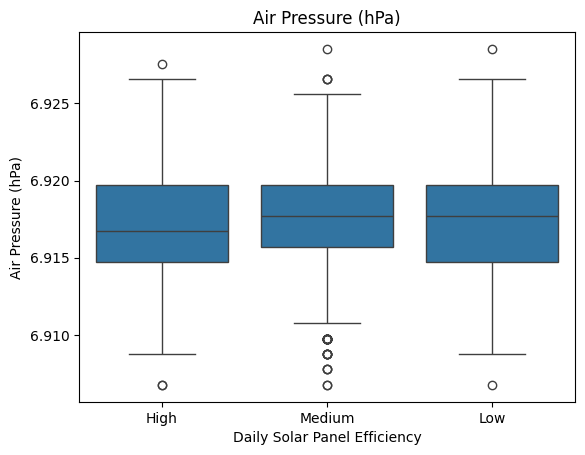

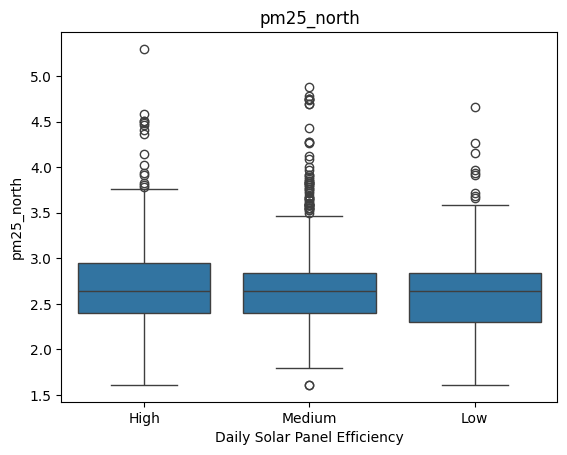

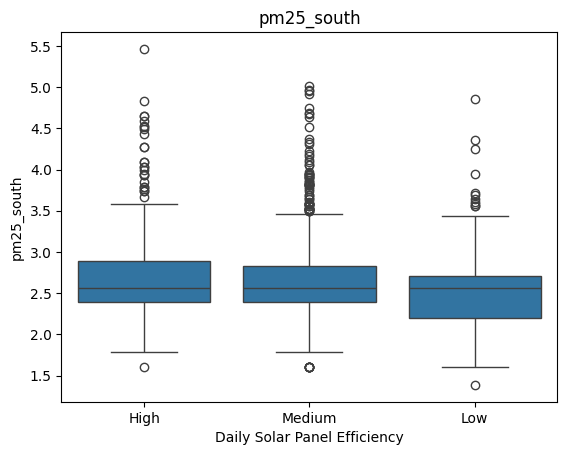

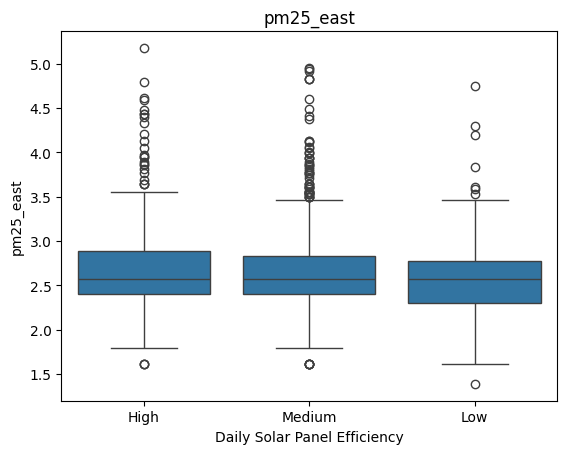

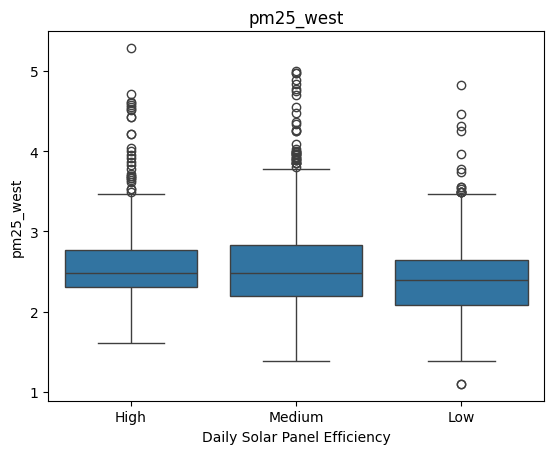

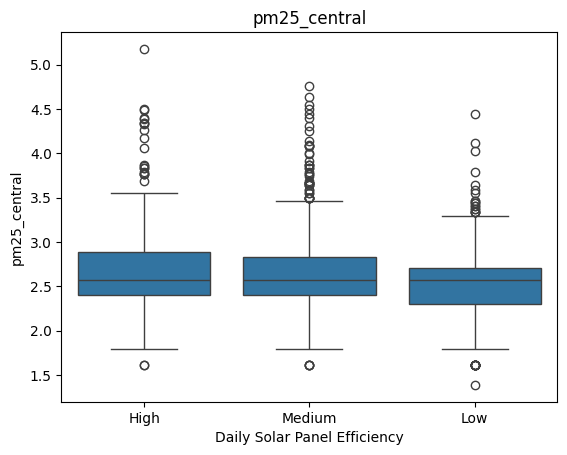

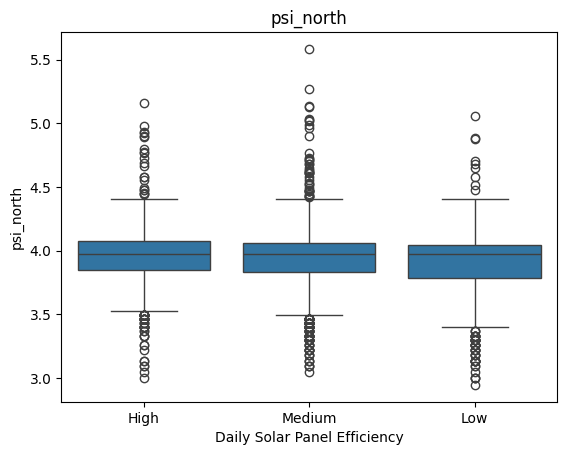

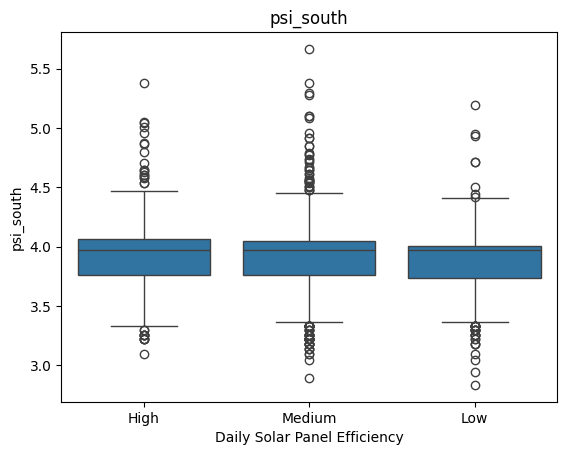

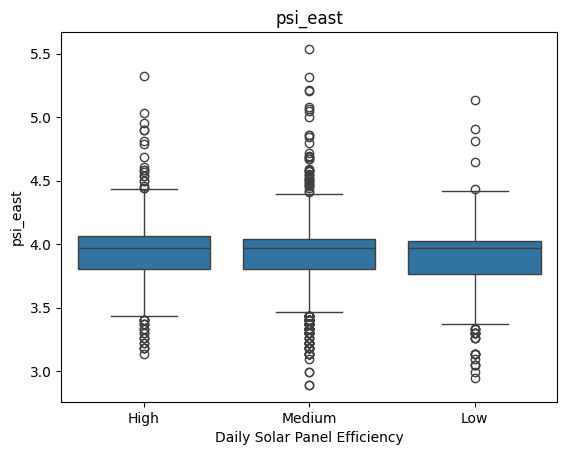

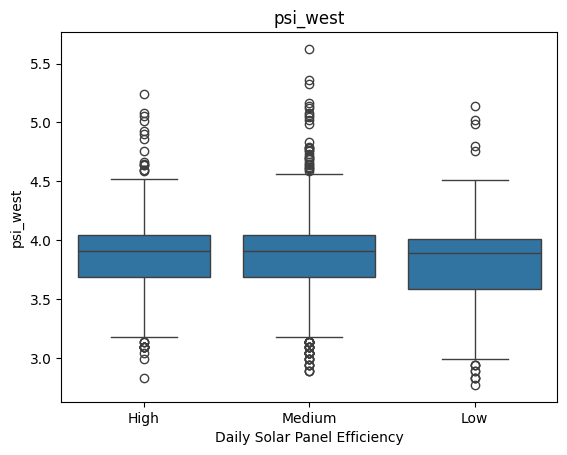

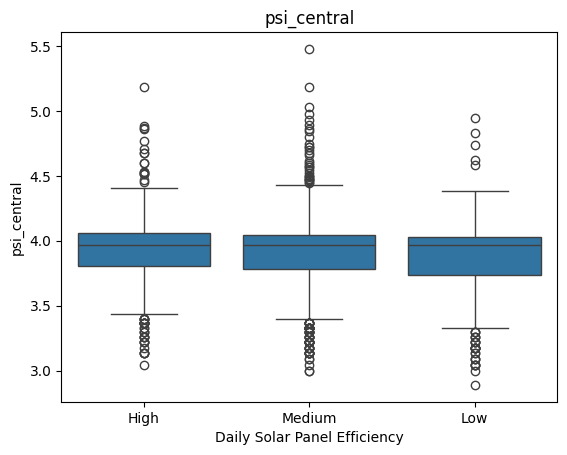

C:\Users\Hyeen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


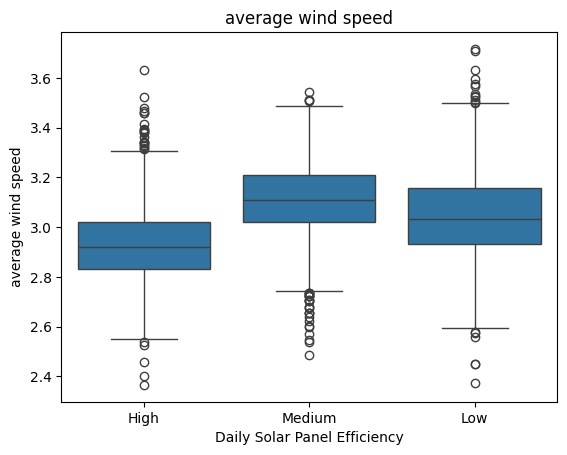

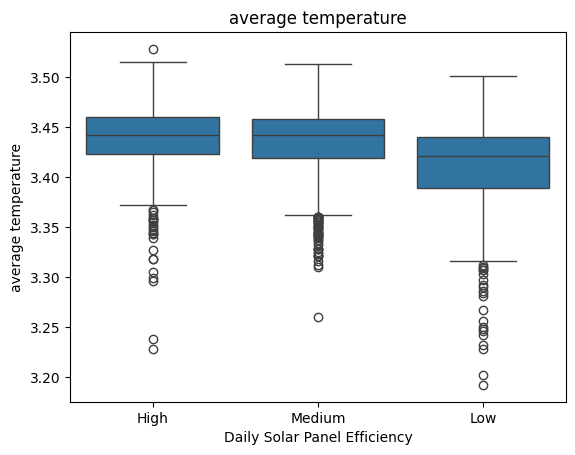

In [52]:
for feature in num_feature:
    data = df.copy()
    data[feature] = np.log1p(data[feature])
    sns.boxplot(data=data,x=classifier, y=feature)
    plt.title(feature)
    plt.show()
    

The outliers got reduced but is still pretty large. I will be testing the model with and without outliers during modeling phase. 
Lets see if the distribution of the data is normalized

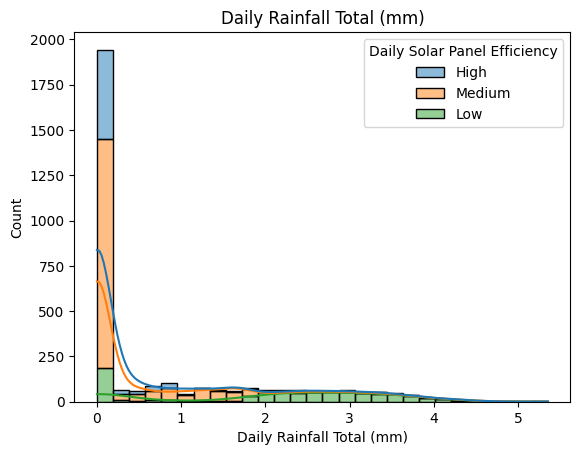

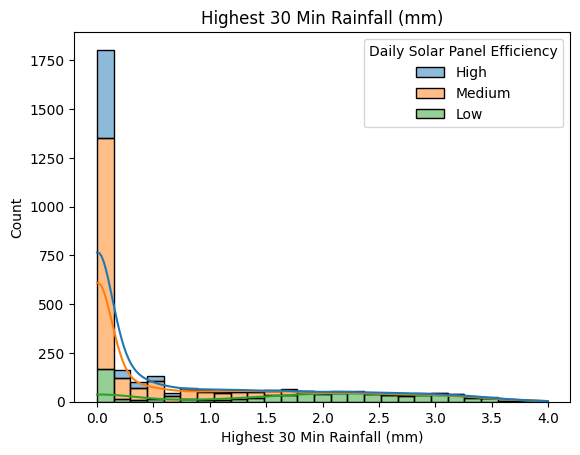

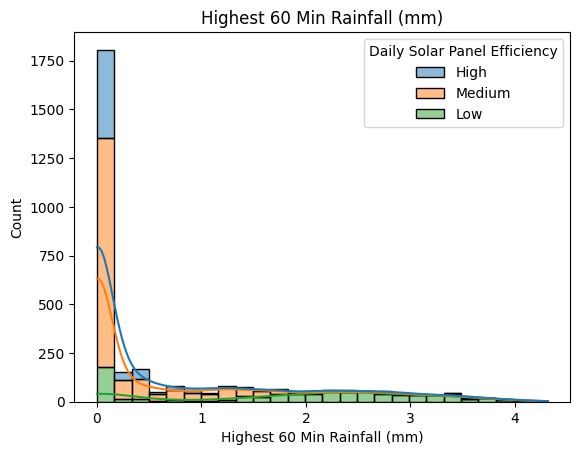

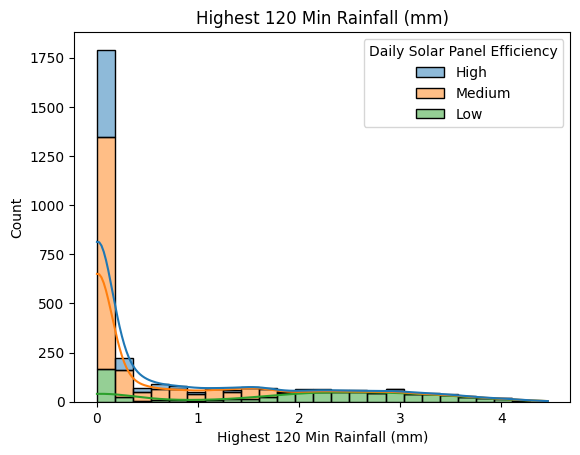

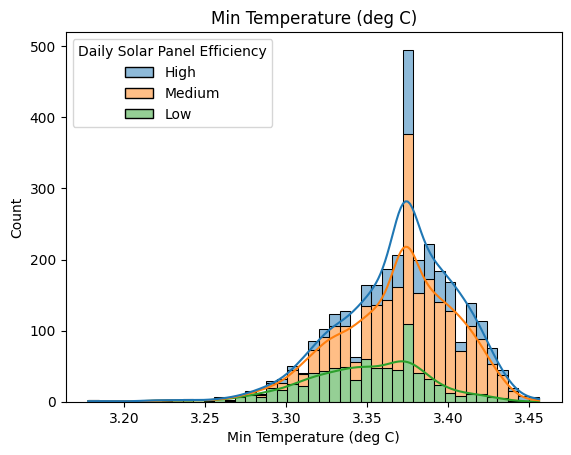

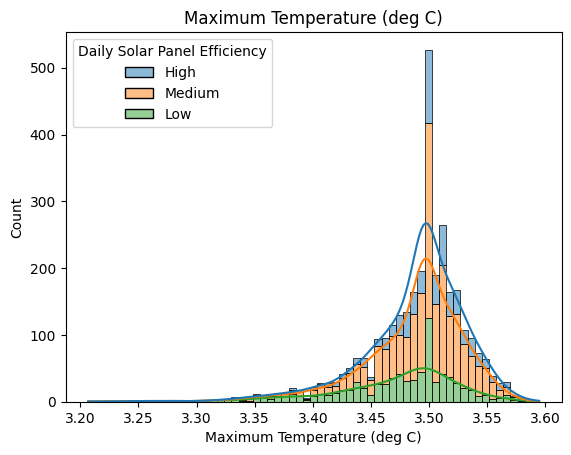

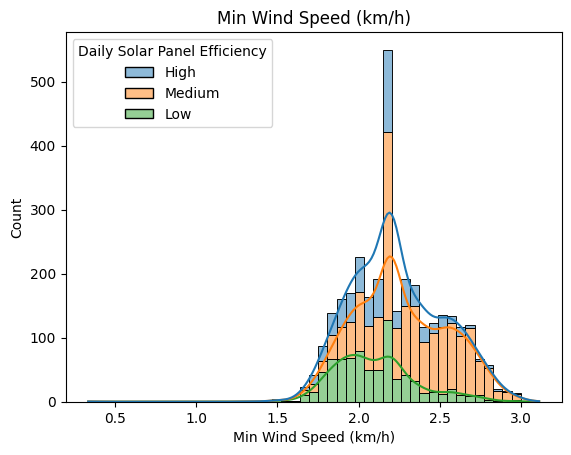

C:\Users\Hyeen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


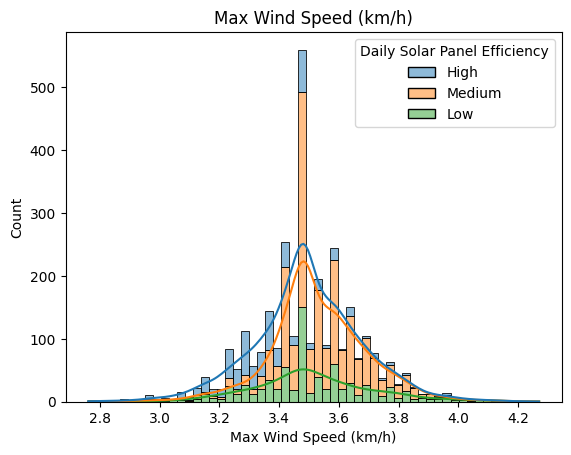

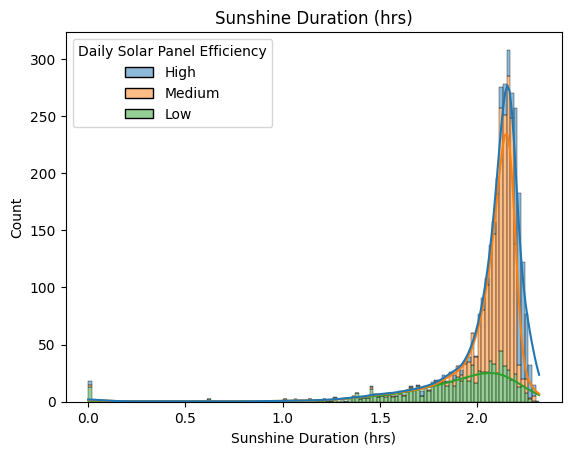

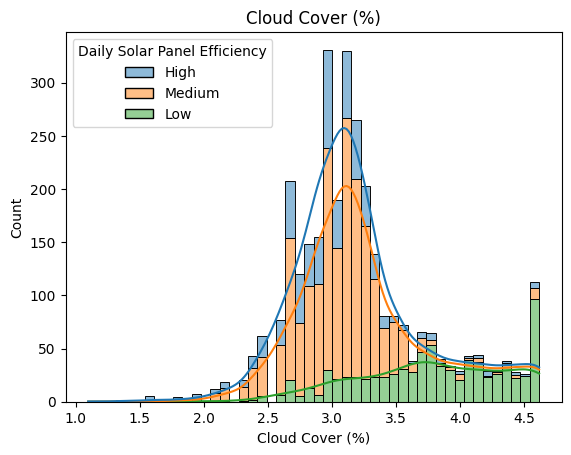

C:\Users\Hyeen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


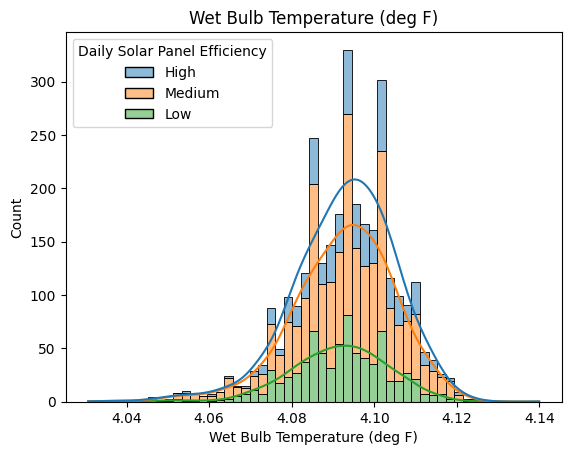

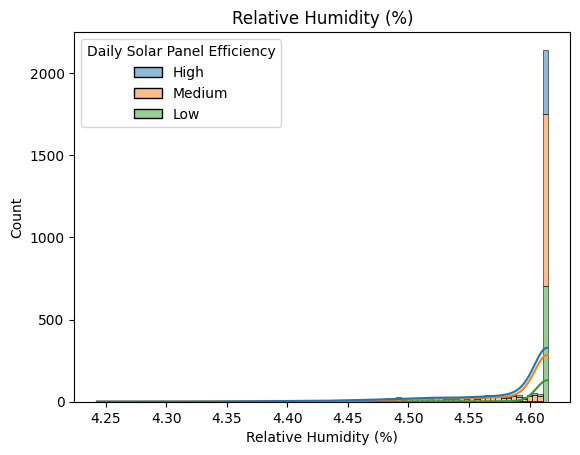

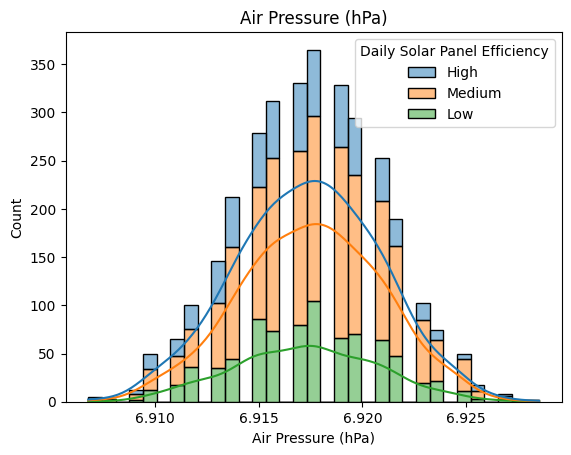

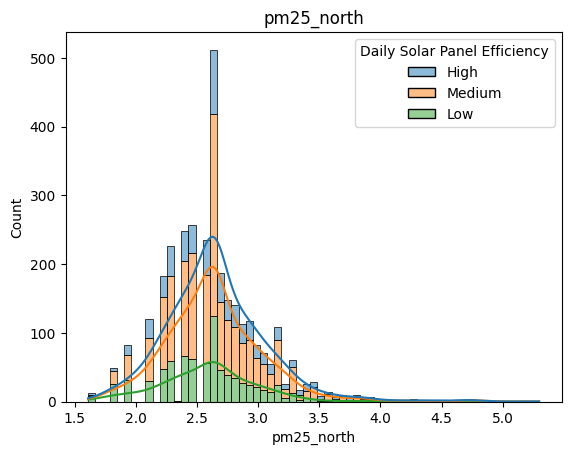

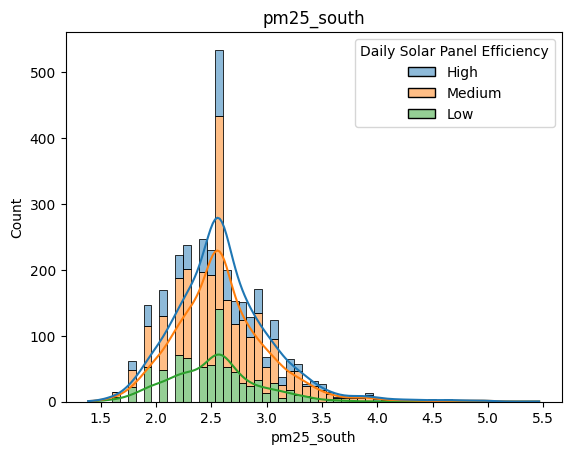

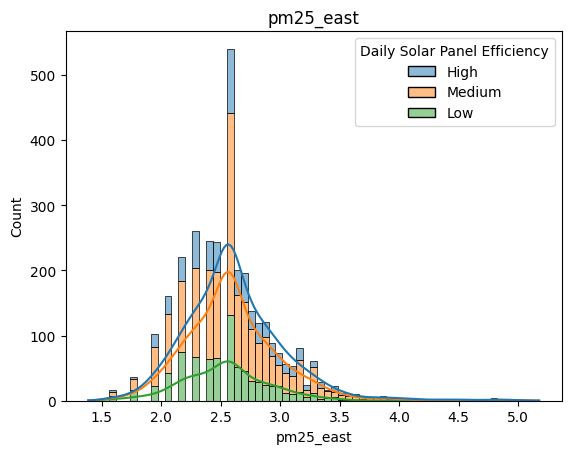

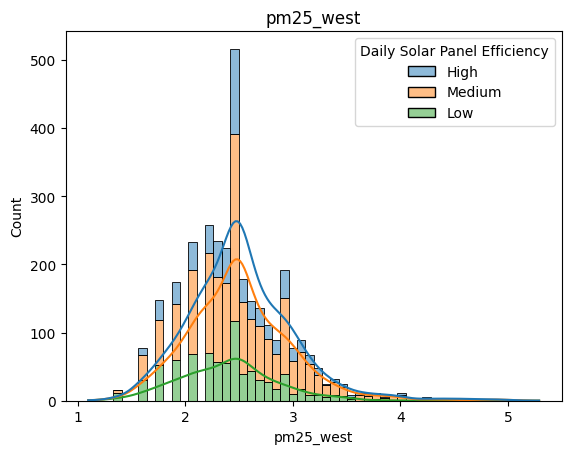

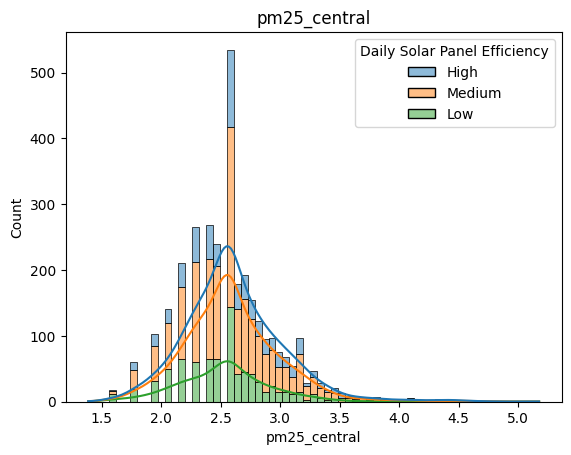

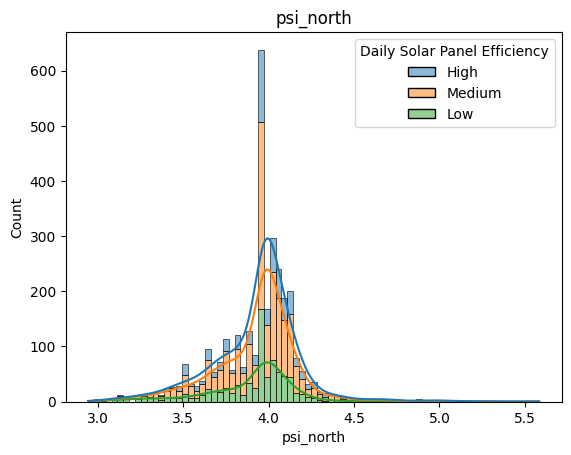

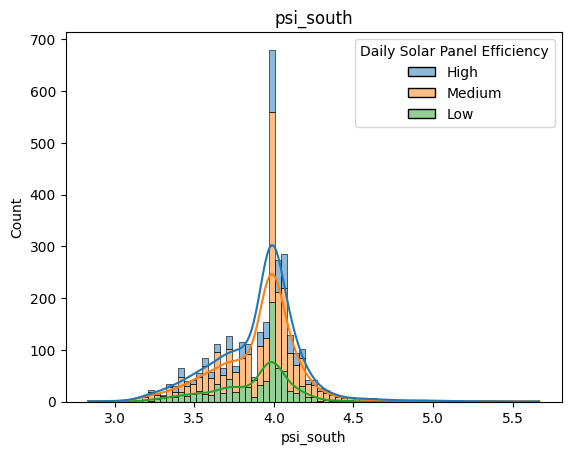

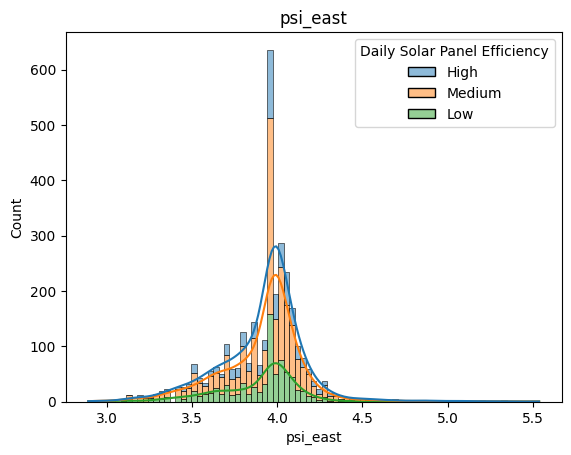

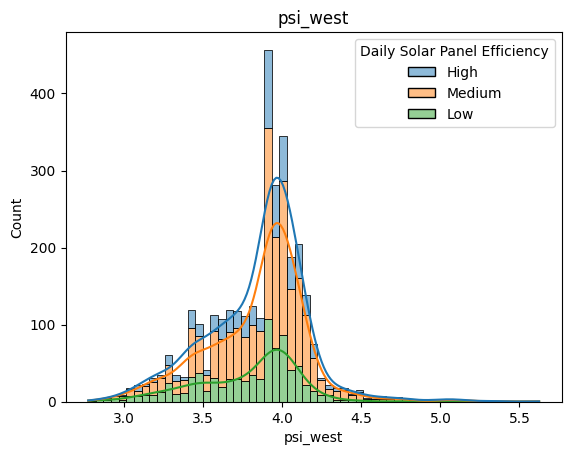

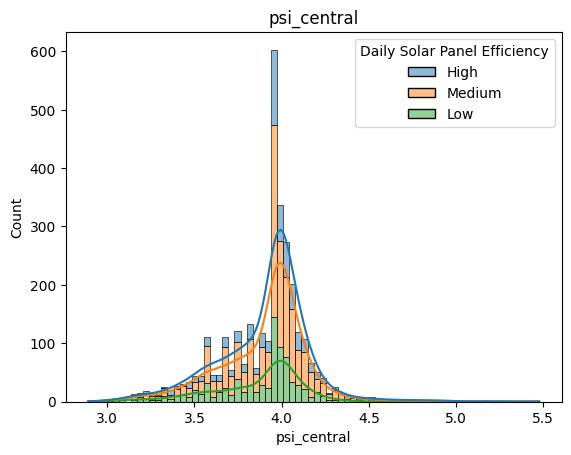

C:\Users\Hyeen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


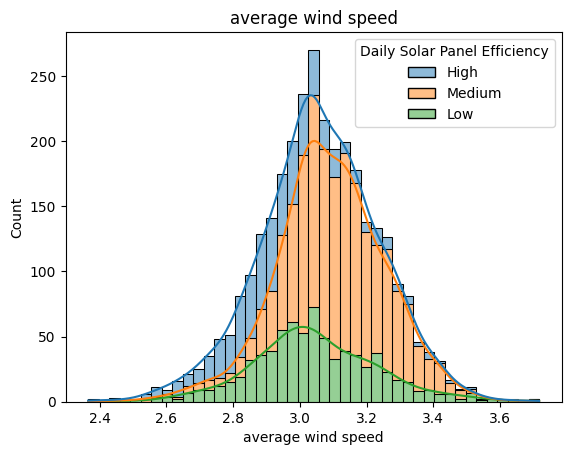

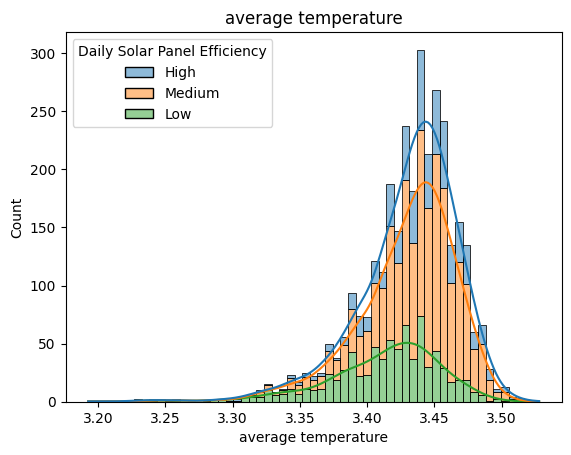

In [53]:
for feature in num_feature:
    data = df.copy()
    data[feature] = np.log1p(data[feature])
    sns.histplot(data=data, x=feature, hue=classifier,kde=True, multiple='stack' )
    plt.title(feature)
    plt.show()

Form the visualisation reference, I will be using standard scaling for avergae wind speed and maybe wet bulb, while using min max scaling for the rest of the feature.

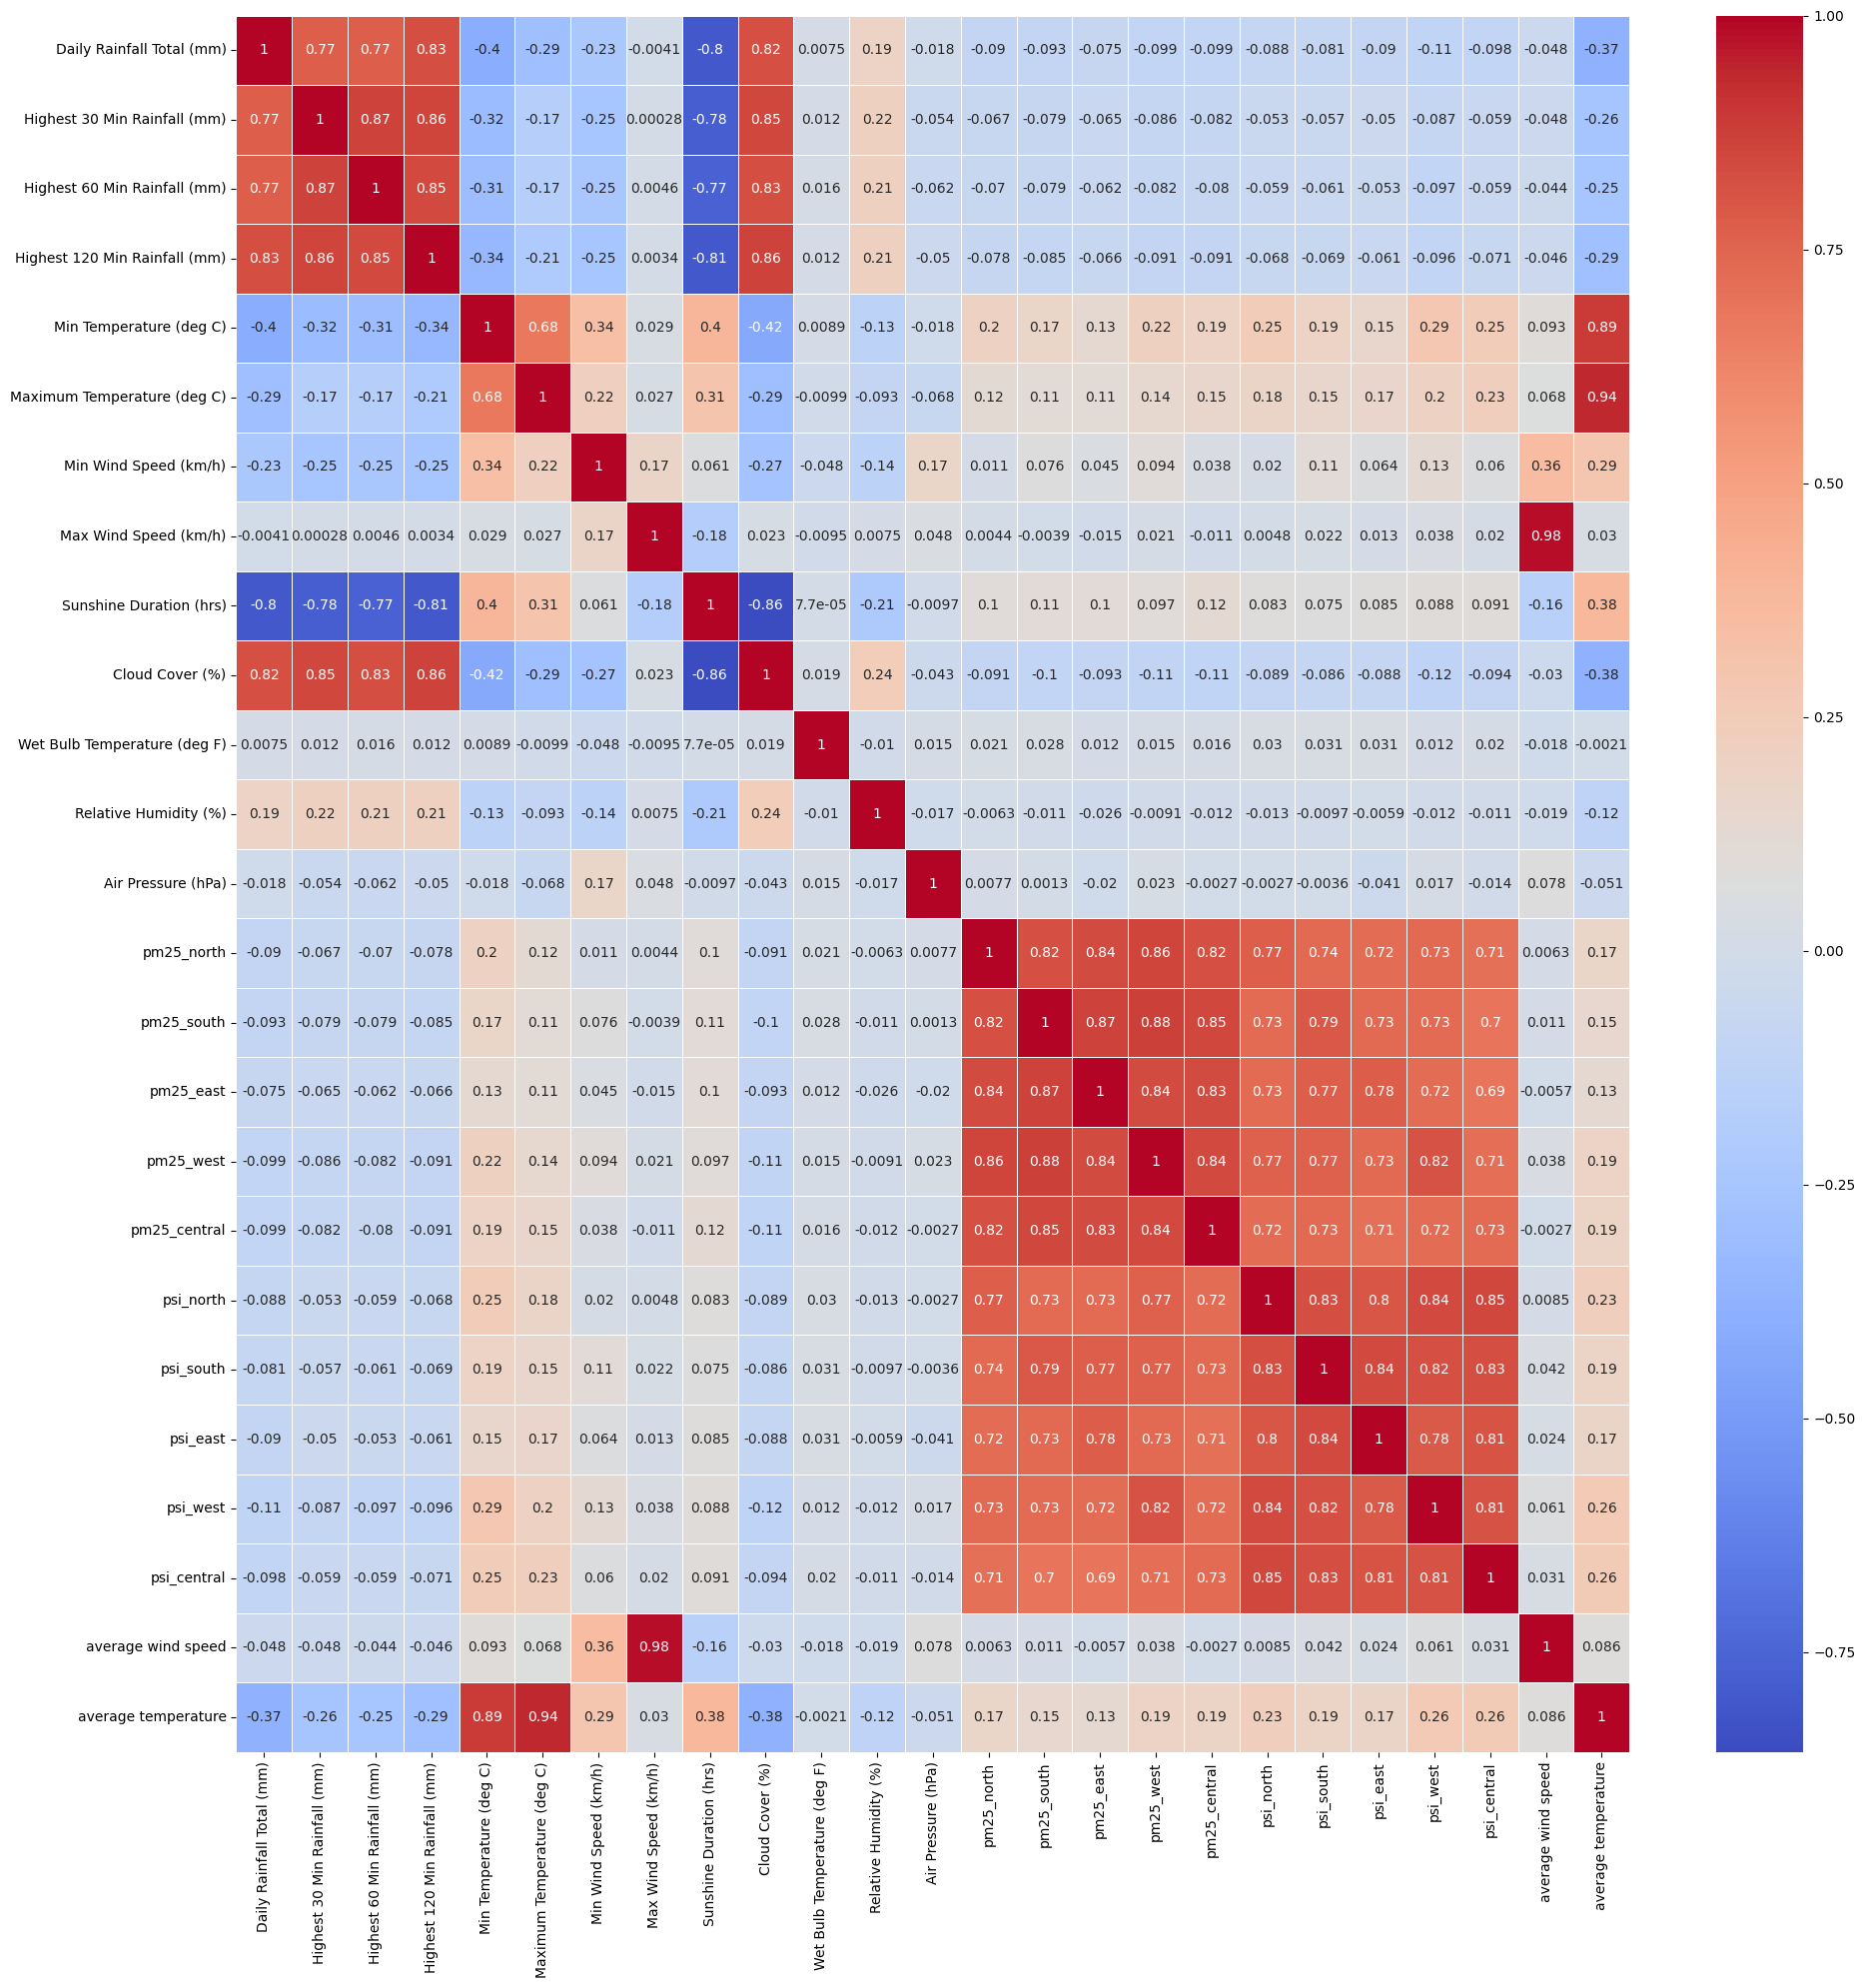

In [54]:
corr_matrix = df[num_feature].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True , cmap='coolwarm', linewidths=0.5)
plt.tight_layout()
plt.show()

- There is a high correlation between cloud % and the rain fall
- High amount of correlation within the pm25 , psi and rainfall.


I will be using average pm25, average psi, and daily rainfall while dropping the rest of the similar data